In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import os
import statistics 
from src.utils import plot_scatter, plot_silhouette
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

In [2]:
Labels = pd.read_excel('Base datos clinica clustering.xlsx')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
drop_columns = []
for i in Labels.columns[13:]:
    drop_columns.append(i)
drop_axis = []
Labels.drop(drop_columns, inplace=True, axis=1)
Labels = Labels[:58]
print(Labels.shape)
Labels.head(-1)

(58, 13)


ID  EDAD   PESO  ALTURA ASIA NIVEL LESION  \
0          L031M3NAAA  21.0   50.5    1.58    D           C7   
1          L043M2NAAA  19.0   54.5    1.68   BC           C6   
2          L043M3NAAA  20.0   55.5    1.69    D           C6   
3          L076M3NAAA  56.0   89.0    1.86    D           C4   
4          L077M1NAAA  13.0   40.5    1.66    d           C4   
5          L080M1NAAA   7.0   22.0    1.16   NS          NaN   
6          L085M2NAAA  60.0   69.0    1.46    D           C4   
7          L091M2NAAA  26.0   80.1    1.80    D           C5   
8          L139M1NAAA  22.0   64.0    1.68    D          D12   
9          L148M1NAAA  14.0   53.1    1.52    D           C8   
10         L148M6NAAA  16.0   53.7    1.56    D           C8   
11         L157M1NAAA  11.0   34.2    1.43    D        D3-D4   
12         L157M2NAAA  12.0   35.0    1.44    D        C3-D4   
13         L157M3NAAA  12.0   36.1    1.46    D        C3-D4   
14         L157M4NAAA  14.0   40.5    1.46    D        C3-D4   
15         L157M5NAAA  15.0   46.0    1.58    C           C8   
16         L162M1NAAA  16.0   92.0    1.75    E           C4   
17         L180M1NAAA  49.0   70.7    1.75    D           C7   
18         L195M1NAAA  18.0   57.2    1.68    D           C7   
19         L199M2NAAA   5.0   23.0    1.20  NaN          NaN   
20         L201M1NAAA  28.0   87.0    1.92    E           C7   
21         L206M1NAAA  63.0   53.5    1.53    D           C5   
22         L206M2NAAA  64.0   54.7    1.53    D           C5   
23         L217M1NAAA  56.0   70.7    1.63    D          D12   
24         L260M1NAAA  28.0   78.3    1.91    D           C5   
25         L265M1NAAA  13.0   46.8    1.53  NaN          NaN   
26         L271M1NAAA  12.0   49.6    1.54    D          D11   
27         L285M1NAAA  36.0   70.0    1.68    D           C6   
28         L288M1NAAA  41.0   88.0    1.80    D          D11   
29         L315M3NAAA  11.0   49.5    1.60  NaN          NaN   
30         L324M1NAAA  37.0   76.6    1.76    D           C5   
31         L351M1NAAA  38.0   86.7    1.78  NaN          NaN   
32         L356M1NAAA   7.0   26.7    1.18  NaN          NaN   
33         L357M1NAAA  13.0   59.2    1.56  NaN          NaN   
34  'M_DR_L038M2NAAA'  21.0   71.0    1.77    D           L2   
35  'M_DR_L065M1NAAA'  58.0   74.4    1.66    D           C7   
36  'M_DR_L083M1NAAA'  20.0   59.0    1.68    D       D12-L1   
37  'M_DR_L087M2NAAA'  24.0   56.3    1.71    D           C7   
38  'M_DR_L092M1NAAA'  51.0   89.0    1.56   NS           NS   
39  'M_DR_L106M2NAAA'  65.0   66.2    1.58    D          D12   
40  'M_DR_L119M1NAAA'  61.0   88.5    1.60    D           C5   
41  'M_DR_L152M1NAAA'  61.0   80.7    1.63    D           C5   
42  'M_DR_L175M2NAAA'  10.0   34.1    1.40    C           L5   
43  'M_DR_L181M4NAAA'   9.0   29.0    1.25    D           L4   
44  'M_DR_L193M1NAAA'   8.0   64.9    1.69    D           C4   
45  'M_DR_L194M1NAAA'  23.0  100.6    1.83  NaN          NaN   
46  'M_DR_L220M1NAAA'  69.0   66.4    1.73    C           C4   
47  'M_DR_L231M1NAAA'  10.0   36.0    1.42    D           C1   
48  'M_DR_L232M2NAAA'  18.0   57.5    1.56    D           C7   
49  'M_DR_L248M1NAAA'  34.0   65.0    1.75    D           L1   
50  'M_DR_L251M1NAAA'  51.0   89.0    1.78    D           L4   
51  'M_DR_L264M1NAAA'  24.0   59.7    1.73    D          D12   
52  'M_DR_L271M2NAAA'  15.0   55.0    1.54    D          D11   
53  'M_DR_L280M1NAAA'  37.0   72.5    1.74    D           C5   
54  'M_DR_L302M2NAAA'  14.0   90.3    1.71    D          D10   
55  'M_DR_L305M1NAAA'  34.0   77.1    1.82    D          D12   
56  'M_DR_L310M1NAAA'  62.0   57.4    1.60    D           C2   

           FECHA LESION        FECHA ESTUDIO  \
0   2006-07-27 00:00:00  2009-05-13 00:00:00   
1   2007-03-05 00:00:00  2008-09-16 00:00:00   
2   2007-03-05 00:00:00  2010-01-27 00:00:00   
3   2007-09-09 00:00:00  2008-09-18 00:00:00   
4   2008-08-19 00:00:00  2008-01-31 00:00:00   
5                 

In [3]:
Dataframe = pd.read_csv('Dataframe_no_kinematics_no_zeros_paired_sorted.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Dataframe = Dataframe.rename(columns = {"Unnamed: 0" :  "Patients"} )
Dataframe = Dataframe.set_index('Patients')
Dataframe.head(-1)

P1         P2        P3         P4        P5  \
Patients                                                               
M_DR_L002M1NAAA  62.939427  37.060573  0.808100  46.982558  1.290000   
M_IZ_L002M1NAAA  67.182370  32.817630  0.865200  50.302326  1.280000   
M_DR_L002M2NAAA  57.795502  42.204498  1.170233  68.036822  1.158333   
M_IZ_L002M2NAAA  62.615632  37.384368  1.116753  64.927519  1.185000   
M_DR_L022M1NAAA  66.656806  33.343194  0.793240  45.328000  1.258333   
M_IZ_L022M1NAAA  66.183206  33.816794  0.824777  47.130095  1.290000   
M_DR_L031M1NAAA  66.041667  33.958333  0.871083  54.785115  1.380000   
M_IZ_L031M1NAAA  66.190476  33.809524  0.862197  54.226205  1.358333   
M_DR_L031M3NAAA  68.096133  31.903867  1.048997  66.392194  1.138333   
M_IZ_L031M3NAAA  67.723138  32.276862  1.097733  69.476793  1.146667   
M_DR_L034M1NAAA  57.568766  42.431234  1.599710  89.886994  1.080000   
M_IZ_L034M1NAAA  60.963455  39.036545  1.620937  91.080352  1.058333   
M_DR_L035M1NAAA  54.942311  45.057689  0.940330  63.535811  1.005000   
M_IZ_L035M1NAAA  60.034653  39.965347  0.975670  65.923649  0.993333   
M_DR_L036M1NAAA  59.827066  40.172934  1.500170  87.729240  1.033333   
M_IZ_L036M1NAAA  58.491659  41.508341  1.508780  88.232749  0.991667   
M_DR_L038M1NAAA  66.769785  33.230215  1.211047  68.822207  1.088333   
M_IZ_L038M1NAAA  64.157910  35.842090  1.187163  67.465392  1.065000   
M_DR_L040M1NAAA  62.898268  37.101732  1.046020  81.742386  0.956667   
M_IZ_L040M1NAAA  60.774795  39.225205  1.023547  79.986558  0.978333   
M_DR_L041M1NAAA  66.151515  33.848485  1.054700  62.408284  1.161667   
M_IZ_L041M1NAAA  62.893754  37.106246  1.064183  62.969428  1.111667   
M_DR_L043M2NAAA  63.129910  36.870090  0.982977  58.510516  1.373333   
M_IZ_L043M2NAAA  69.486596  30.513404  1.026027  61.073016  1.423333   
M_DR_L043M3NAAA  64.605862  35.394138  1.083733  64.126233  1.276667   
M_IZ_L043M3NAAA  67.075819  32.924181  1.150933  68.102564  1.311667   
M_DR_L050M1NAAA  72.374612  27.625388  0.533837  31.794918  1.961667   
M_IZ_L050M1NAAA  71.383372  28.616628  0.537640  32.021441  1.981667   
M_DR_L052M2NAAA  66.026839  33.973161  0.892070  58.330984  1.280000   
M_IZ_L052M2NAAA  71.490938  28.509062  0.925657  60.526873  1.261667   
M_DR_L059M1NAAA  64.770837  35.229163  1.245190  82.499140  1.041667   
M_IZ_L059M1NAAA  64.697383  35.302617  1.189907  78.837222  1.041667   
M_DR_L060M1NAAA  70.968768  29.031232  0.991583  51.385322  1.288333   
M_IZ_L060M1NAAA  72.393408  27.606592  0.961377  49.820331  1.213333   
M_DR_L076M3NAAA  69.095944  30.904056  1.031623  55.463620  1.235000   
M_IZ_L076M3NAAA  66.468799  33.531201  1.078493  57.983513  1.253333   
M_DR_L077M1NAAA  66.533531  33.466469  1.036353  62.455625  1.260000   
M_IZ_L077M1NAAA  63.168925  36.831075  1.032173  62.204374  1.271667   
M_DR_L080M1NAAA  60.213781  39.786219  0.775443  66.848563  1.226667   
M_IZ_L080M1NAAA  66.638245  33.361755  0.818310  70.543966  1.286667   
M_DR_L085M2NAAA  74.666629  25.333371  0.674523  46.200228  1.773333   
M_IZ_L085M2NAAA  74.085286  25.914714  0.645663  44.223516  1.785000   
M_DR_L091M2NAAA  67.143497  32.856503  1.146883  63.715741  1.593333   
M_IZ_L091M2NAAA  70.052739  29.947261  1.224173  68.009630  1.615000   
M_DR_L139M1NAAA  79.858713  20.141287  0.708287  42.159921  2.196667   
M_IZ_L139M1NAAA  79.561277  20.438723  0.719063  42.801389  2.181667   
M_DR_L148M1NAAA  67.880817  32.119183  0.962713  63.336404  1.276667   
M_IZ_L148M1NAAA  60.435901  39.564099  1.059197  69.683991  1.350000   
M_DR_L148M6NAAA  72.843982  27.156018  0.956863  58.714868  1.303333   
M_IZ_L148M6NAAA  66.894686  33.105314  0.954790  58.587907  1.243333   
M_DR_L157M1NAAA  73.409487  26.590513  1.138473  79.613520  1.441667   
M_IZ_L157M1NAAA  66.331380  33.668620  1.119970  78.319580  1.321667   
M_DR_L157M2NAAA  72.106271  27.893729  1.048490  72.811806  1.170000   
M_IZ_L157M2NAAA  65.582494  34.417506  1.179193  81.888426  1.23

In [4]:
list_patients_label = []
for j in Labels.ID:
    list_patients_label.append(j)
print(list_patients_label) 

['L031M3NAAA', 'L043M2NAAA', 'L043M3NAAA', 'L076M3NAAA', 'L077M1NAAA', 'L080M1NAAA', 'L085M2NAAA', 'L091M2NAAA', 'L139M1NAAA', 'L148M1NAAA', 'L148M6NAAA', 'L157M1NAAA', 'L157M2NAAA', 'L157M3NAAA', 'L157M4NAAA', 'L157M5NAAA', 'L162M1NAAA', 'L180M1NAAA', 'L195M1NAAA', 'L199M2NAAA', 'L201M1NAAA', 'L206M1NAAA', 'L206M2NAAA', 'L217M1NAAA', 'L260M1NAAA', 'L265M1NAAA', 'L271M1NAAA', 'L285M1NAAA', 'L288M1NAAA', 'L315M3NAAA', 'L324M1NAAA', 'L351M1NAAA', 'L356M1NAAA', 'L357M1NAAA', "'M_DR_L038M2NAAA'", "'M_DR_L065M1NAAA'", "'M_DR_L083M1NAAA'", "'M_DR_L087M2NAAA'", "'M_DR_L092M1NAAA'", "'M_DR_L106M2NAAA'", "'M_DR_L119M1NAAA'", "'M_DR_L152M1NAAA'", "'M_DR_L175M2NAAA'", "'M_DR_L181M4NAAA'", "'M_DR_L193M1NAAA'", "'M_DR_L194M1NAAA'", "'M_DR_L220M1NAAA'", "'M_DR_L231M1NAAA'", "'M_DR_L232M2NAAA'", "'M_DR_L248M1NAAA'", "'M_DR_L251M1NAAA'", "'M_DR_L264M1NAAA'", "'M_DR_L271M2NAAA'", "'M_DR_L280M1NAAA'", "'M_DR_L302M2NAAA'", "'M_DR_L305M1NAAA'", "'M_DR_L310M1NAAA'", "'M_IZ_L003M2NAAA'"]


In [23]:
print(list_patients_label[0:34]) 
new_list_patients_label = list_patients_label[0:34]
print('')
print(new_list_patients_label)
print(len(new_list_patients_label))

print('')
new_new_list_patients_label = list_patients_label[34:]
print(new_new_list_patients_label)
print(len(new_new_list_patients_label))

['L031M3NAAA', 'L043M2NAAA', 'L043M3NAAA', 'L076M3NAAA', 'L077M1NAAA', 'L080M1NAAA', 'L085M2NAAA', 'L091M2NAAA', 'L139M1NAAA', 'L148M1NAAA', 'L148M6NAAA', 'L157M1NAAA', 'L157M2NAAA', 'L157M3NAAA', 'L157M4NAAA', 'L157M5NAAA', 'L162M1NAAA', 'L180M1NAAA', 'L195M1NAAA', 'L199M2NAAA', 'L201M1NAAA', 'L206M1NAAA', 'L206M2NAAA', 'L217M1NAAA', 'L260M1NAAA', 'L265M1NAAA', 'L271M1NAAA', 'L285M1NAAA', 'L288M1NAAA', 'L315M3NAAA', 'L324M1NAAA', 'L351M1NAAA', 'L356M1NAAA', 'L357M1NAAA']

['L031M3NAAA', 'L043M2NAAA', 'L043M3NAAA', 'L076M3NAAA', 'L077M1NAAA', 'L080M1NAAA', 'L085M2NAAA', 'L091M2NAAA', 'L139M1NAAA', 'L148M1NAAA', 'L148M6NAAA', 'L157M1NAAA', 'L157M2NAAA', 'L157M3NAAA', 'L157M4NAAA', 'L157M5NAAA', 'L162M1NAAA', 'L180M1NAAA', 'L195M1NAAA', 'L199M2NAAA', 'L201M1NAAA', 'L206M1NAAA', 'L206M2NAAA', 'L217M1NAAA', 'L260M1NAAA', 'L265M1NAAA', 'L271M1NAAA', 'L285M1NAAA', 'L288M1NAAA', 'L315M3NAAA', 'L324M1NAAA', 'L351M1NAAA', 'L356M1NAAA', 'L357M1NAAA']
34

["'M_DR_L038M2NAAA'", "'M_DR_L065M1NAAA'"

In [5]:
list_patients_data = []
for l in Dataframe.index:
     list_patients_data.append(l)
print(list_patients_data)

['M_DR_L002M1NAAA', 'M_IZ_L002M1NAAA', 'M_DR_L002M2NAAA', 'M_IZ_L002M2NAAA', 'M_DR_L022M1NAAA', 'M_IZ_L022M1NAAA', 'M_DR_L031M1NAAA', 'M_IZ_L031M1NAAA', 'M_DR_L031M3NAAA', 'M_IZ_L031M3NAAA', 'M_DR_L034M1NAAA', 'M_IZ_L034M1NAAA', 'M_DR_L035M1NAAA', 'M_IZ_L035M1NAAA', 'M_DR_L036M1NAAA', 'M_IZ_L036M1NAAA', 'M_DR_L038M1NAAA', 'M_IZ_L038M1NAAA', 'M_DR_L040M1NAAA', 'M_IZ_L040M1NAAA', 'M_DR_L041M1NAAA', 'M_IZ_L041M1NAAA', 'M_DR_L043M2NAAA', 'M_IZ_L043M2NAAA', 'M_DR_L043M3NAAA', 'M_IZ_L043M3NAAA', 'M_DR_L050M1NAAA', 'M_IZ_L050M1NAAA', 'M_DR_L052M2NAAA', 'M_IZ_L052M2NAAA', 'M_DR_L059M1NAAA', 'M_IZ_L059M1NAAA', 'M_DR_L060M1NAAA', 'M_IZ_L060M1NAAA', 'M_DR_L076M3NAAA', 'M_IZ_L076M3NAAA', 'M_DR_L077M1NAAA', 'M_IZ_L077M1NAAA', 'M_DR_L080M1NAAA', 'M_IZ_L080M1NAAA', 'M_DR_L085M2NAAA', 'M_IZ_L085M2NAAA', 'M_DR_L091M2NAAA', 'M_IZ_L091M2NAAA', 'M_DR_L139M1NAAA', 'M_IZ_L139M1NAAA', 'M_DR_L148M1NAAA', 'M_IZ_L148M1NAAA', 'M_DR_L148M6NAAA', 'M_IZ_L148M6NAAA', 'M_DR_L157M1NAAA', 'M_IZ_L157M1NAAA', 'M_DR_L157M

In [8]:
print(list_patients_data[0][5:])

L002M1NAAA


In [19]:
counter = 0
for i in list_patients_data:
    if i[5:] in new_list_patients_label:
        print('Checked : ', i)
        counter += 1

Checked :  M_DR_L031M3NAAA
Checked :  M_IZ_L031M3NAAA
Checked :  M_DR_L043M2NAAA
Checked :  M_IZ_L043M2NAAA
Checked :  M_DR_L043M3NAAA
Checked :  M_IZ_L043M3NAAA
Checked :  M_DR_L076M3NAAA
Checked :  M_IZ_L076M3NAAA
Checked :  M_DR_L077M1NAAA
Checked :  M_IZ_L077M1NAAA
Checked :  M_DR_L080M1NAAA
Checked :  M_IZ_L080M1NAAA
Checked :  M_DR_L085M2NAAA
Checked :  M_IZ_L085M2NAAA
Checked :  M_DR_L091M2NAAA
Checked :  M_IZ_L091M2NAAA
Checked :  M_DR_L139M1NAAA
Checked :  M_IZ_L139M1NAAA
Checked :  M_DR_L148M1NAAA
Checked :  M_IZ_L148M1NAAA
Checked :  M_DR_L148M6NAAA
Checked :  M_IZ_L148M6NAAA
Checked :  M_DR_L157M1NAAA
Checked :  M_IZ_L157M1NAAA
Checked :  M_DR_L157M2NAAA
Checked :  M_IZ_L157M2NAAA
Checked :  M_DR_L157M3NAAA
Checked :  M_IZ_L157M3NAAA
Checked :  M_DR_L157M4NAAA
Checked :  M_IZ_L157M4NAAA
Checked :  M_DR_L157M5NAAA
Checked :  M_IZ_L157M5NAAA
Checked :  M_DR_L162M1NAAA
Checked :  M_IZ_L162M1NAAA
Checked :  M_DR_L180M1NAAA
Checked :  M_IZ_L180M1NAAA
Checked :  M_DR_L195M1NAAA
C

In [20]:
print(counter)

68


In [60]:
for i in list_patients_data:
    if i in list_patients_label:
        print('Checked : ', i)

---

In [3]:
print('Nº of observations = ', Dataframe.shape[0], ' and nº of features = ', Dataframe.shape[1] )
print('')
print('Patients : ', Dataframe.index)
print('')
print('Features : ', Dataframe.columns)

Nº of observations =  100  and nº of features =  100

Patients :  Index(['M_DR_L002M1NAAA', 'M_IZ_L002M1NAAA', 'M_DR_L002M2NAAA',
       'M_IZ_L002M2NAAA', 'M_DR_L022M1NAAA', 'M_IZ_L022M1NAAA',
       'M_DR_L031M1NAAA', 'M_IZ_L031M1NAAA', 'M_DR_L031M3NAAA',
       'M_IZ_L031M3NAAA', 'M_DR_L034M1NAAA', 'M_IZ_L034M1NAAA',
       'M_DR_L035M1NAAA', 'M_IZ_L035M1NAAA', 'M_DR_L036M1NAAA',
       'M_IZ_L036M1NAAA', 'M_DR_L038M1NAAA', 'M_IZ_L038M1NAAA',
       'M_DR_L040M1NAAA', 'M_IZ_L040M1NAAA', 'M_DR_L041M1NAAA',
       'M_IZ_L041M1NAAA', 'M_DR_L043M2NAAA', 'M_IZ_L043M2NAAA',
       'M_DR_L043M3NAAA', 'M_IZ_L043M3NAAA', 'M_DR_L050M1NAAA',
       'M_IZ_L050M1NAAA', 'M_DR_L052M2NAAA', 'M_IZ_L052M2NAAA',
       'M_DR_L059M1NAAA', 'M_IZ_L059M1NAAA', 'M_DR_L060M1NAAA',
       'M_IZ_L060M1NAAA', 'M_DR_L076M3NAAA', 'M_IZ_L076M3NAAA',
       'M_DR_L077M1NAAA', 'M_IZ_L077M1NAAA', 'M_DR_L080M1NAAA',
       'M_IZ_L080M1NAAA', 'M_DR_L085M2NAAA', 'M_IZ_L085M2NAAA',
       'M_DR_L091M2NAAA', 'M_IZ_L091M2

In [4]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, M_DR_L002M1NAAA to M_IZ_L374M1NAAA
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      100 non-null    float64
 1   P2      100 non-null    float64
 2   P3      100 non-null    float64
 3   P4      100 non-null    float64
 4   P5      100 non-null    float64
 5   P6      100 non-null    float64
 6   P7      100 non-null    float64
 7   P8      100 non-null    float64
 8   P9      100 non-null    float64
 9   P10     100 non-null    float64
 10  P11     100 non-null    float64
 11  P12     100 non-null    float64
 12  P13     100 non-null    float64
 13  P14     100 non-null    float64
 14  HV1     100 non-null    float64
 15  HV2     100 non-null    float64
 16  KV1     100 non-null    float64
 17  KV2     99 non-null     float64
 18  AV1     100 non-null    float64
 19  Vfdt1   100 non-null    float64
 20  Vfdt2   100 non-null    float64
 21  HR1     100 non-n

## 1 nun value in KV2     

In [5]:
is_NaN = Dataframe.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = Dataframe[row_has_NaN]
print(rows_with_NaN)

                        P1         P2        P3         P4        P5  \
Patients                                                               
M_DR_L195M1NAAA  66.045478  33.954522  1.147433  67.496078  1.188333   

                        P6        P7         P8        P9        P10  \
Patients                                                               
M_DR_L195M1NAAA  50.529104  0.966438  56.849304  0.605473  35.616078   

                      P11        P12    P13   P14        HV1        HV2  \
Patients                                                                  
M_DR_L195M1NAAA  0.601667  99.827558  0.395  0.21 -13.579609  54.655087   

                        KV1  KV2        AV1       Vfdt1      Vfdt2     HR1  \
Patients                                                                     
M_DR_L195M1NAAA  114.673865  NaN -27.804906  1410.24111  57.918456  19.623   

                    HR2    HR3       THR1       THR2       HR4       HR5  \
Patients                     

In [6]:
Dataframe.loc[['M_DR_L195M1NAAA','M_IZ_L195M1NAAA']].head()

P1         P2        P3         P4        P5  \
Patients                                                               
M_DR_L195M1NAAA  66.045478  33.954522  1.147433  67.496078  1.188333   
M_IZ_L195M1NAAA  67.321753  32.678247  1.200217  70.600980  1.206667   

                        P6        P7         P8        P9        P10  \
Patients                                                               
M_DR_L195M1NAAA  50.529104  0.966438  56.849304  0.605473  35.616078   
M_IZ_L195M1NAAA  49.828147  0.996340  58.608232  0.594743  34.984902   

                      P11        P12       P13       P14        HV1  \
Patients                                                              
M_DR_L195M1NAAA  0.601667  99.827558  0.395000  0.210000 -13.579609   
M_IZ_L195M1NAAA  0.605000  99.528100  0.403333  0.198333 -10.943494   

                       HV2         KV1         KV2        AV1        Vfdt1  \
Patients                                                                     
M_DR_L195M1NAAA  54.655087  114.673865         NaN -27.804906  1410.241110   
M_IZ_L195M1NAAA   6.191831   18.948568 -202.057007  -7.451678    24.350706   

                     Vfdt2        HR1        HR2       HR3       THR1  \
Patients                                                                
M_DR_L195M1NAAA  57.918456  19.623000  17.127000  2.496000  63.064135   
M_IZ_L195M1NAAA  80.025271  20.468333  17.328667  3.139667  85.080645   

                      THR2       HR4       HR5        HR6       THR4  \
Patients                                                               
M_DR_L195M1NAAA  30.631882  6.365667 -4.261333  10.627000  20.618146   
M_IZ_L195M1NAAA  32.052745  4.261333 -5.902333  10.163667  10.653297   

                      THR5       HR7       HR8        HR9       THR7  \
Patients                                                               
M_DR_L195M1NAAA  60.036198  8.263333 -3.356000  11.619333  25.568188   
M_IZ_L195M1NAAA  69.743439  3.356000 -7.465333  10.821333  33.071272   

                      THR8         H1         H2        H3         H4  \
Patients                                                                
M_DR_L195M1NAAA  82.913376  46.170667  46.989667  9.645667  19.459333   
M_IZ_L195M1NAAA  77.259796  43.114000  45.596000  6.925333  22.214667   

                        H5         H6         H7       TH2        TH3  \
Patients                                                                
M_DR_L195M1NAAA  47.206667  19.459333  38.061000  4.255339  55.233872   
M_IZ_L195M1NAAA  48.119000  22.214667  41.193667  6.109344  53.898763   

                       TH5        TH6        H8     H9       H10    H11  \
Patients                                                                  
M_DR_L195M1NAAA  97.775421  66.045478 -1.255667  5.815 -2.794667 -1.296   
M_IZ_L195M1NAAA  88.468246  67.321753 -1.857000  2.868 -9.697000 -9.686   

                   H12       H13        H14        TH9       TH10       TH12  \
Patients                                                                       
M_DR_L195M1NAAA  1.536 -3.064000   9.088667  31.794942  23.806999  88.320439   
M_IZ_L195M1NAAA -1.649 -9.709333  12.591333  12.524265  66.906518  90.057313   

                      TH13       H15        H16        H17      THR15  \
Patients                                                                
M_DR_L195M1NAAA  71.663572  1.270667 -21.208667  22.479333  36.524424   
M_IZ_L195M1NAAA  67.990570  2.807000 -15.322333  18.129333  63.777562   

                     THR16         K1         K2        K3         K4  \
Patients                                                                
M_DR_L195M1NAAA  75.460951  11.095000  48.434667  9.429333  49.756000   
M_IZ_L195M1NAAA  74.433419   7.149333  52.783000  6.966000  54.167667   

                        K5     K6         K7        TK2        TK3        TK5  \
Patients                                                                        
M_DR_L195M1NAAA  64.9

In [7]:
Dataframe = Dataframe.drop(['M_DR_L195M1NAAA','M_IZ_L195M1NAAA'])

In [8]:
print('Nº of observations = ', Dataframe.shape[0], ' and nº of features = ', Dataframe.shape[1] )

Nº of observations =  98  and nº of features =  100


In [9]:
for i in Dataframe.columns:
    n = len(pd.unique(Dataframe[i]))
    print('Number of unique values in column : ', i , ' = ' , n)

Number of unique values in column :  P1  =  98
Number of unique values in column :  P2  =  98
Number of unique values in column :  P3  =  98
Number of unique values in column :  P4  =  98
Number of unique values in column :  P5  =  84
Number of unique values in column :  P6  =  97
Number of unique values in column :  P7  =  98
Number of unique values in column :  P8  =  98
Number of unique values in column :  P9  =  98
Number of unique values in column :  P10  =  98
Number of unique values in column :  P11  =  83
Number of unique values in column :  P12  =  96
Number of unique values in column :  P13  =  71
Number of unique values in column :  P14  =  75
Number of unique values in column :  HV1  =  98
Number of unique values in column :  HV2  =  98
Number of unique values in column :  KV1  =  98
Number of unique values in column :  KV2  =  98
Number of unique values in column :  AV1  =  98
Number of unique values in column :  Vfdt1  =  98
Number of unique values in column :  Vfdt2  =  

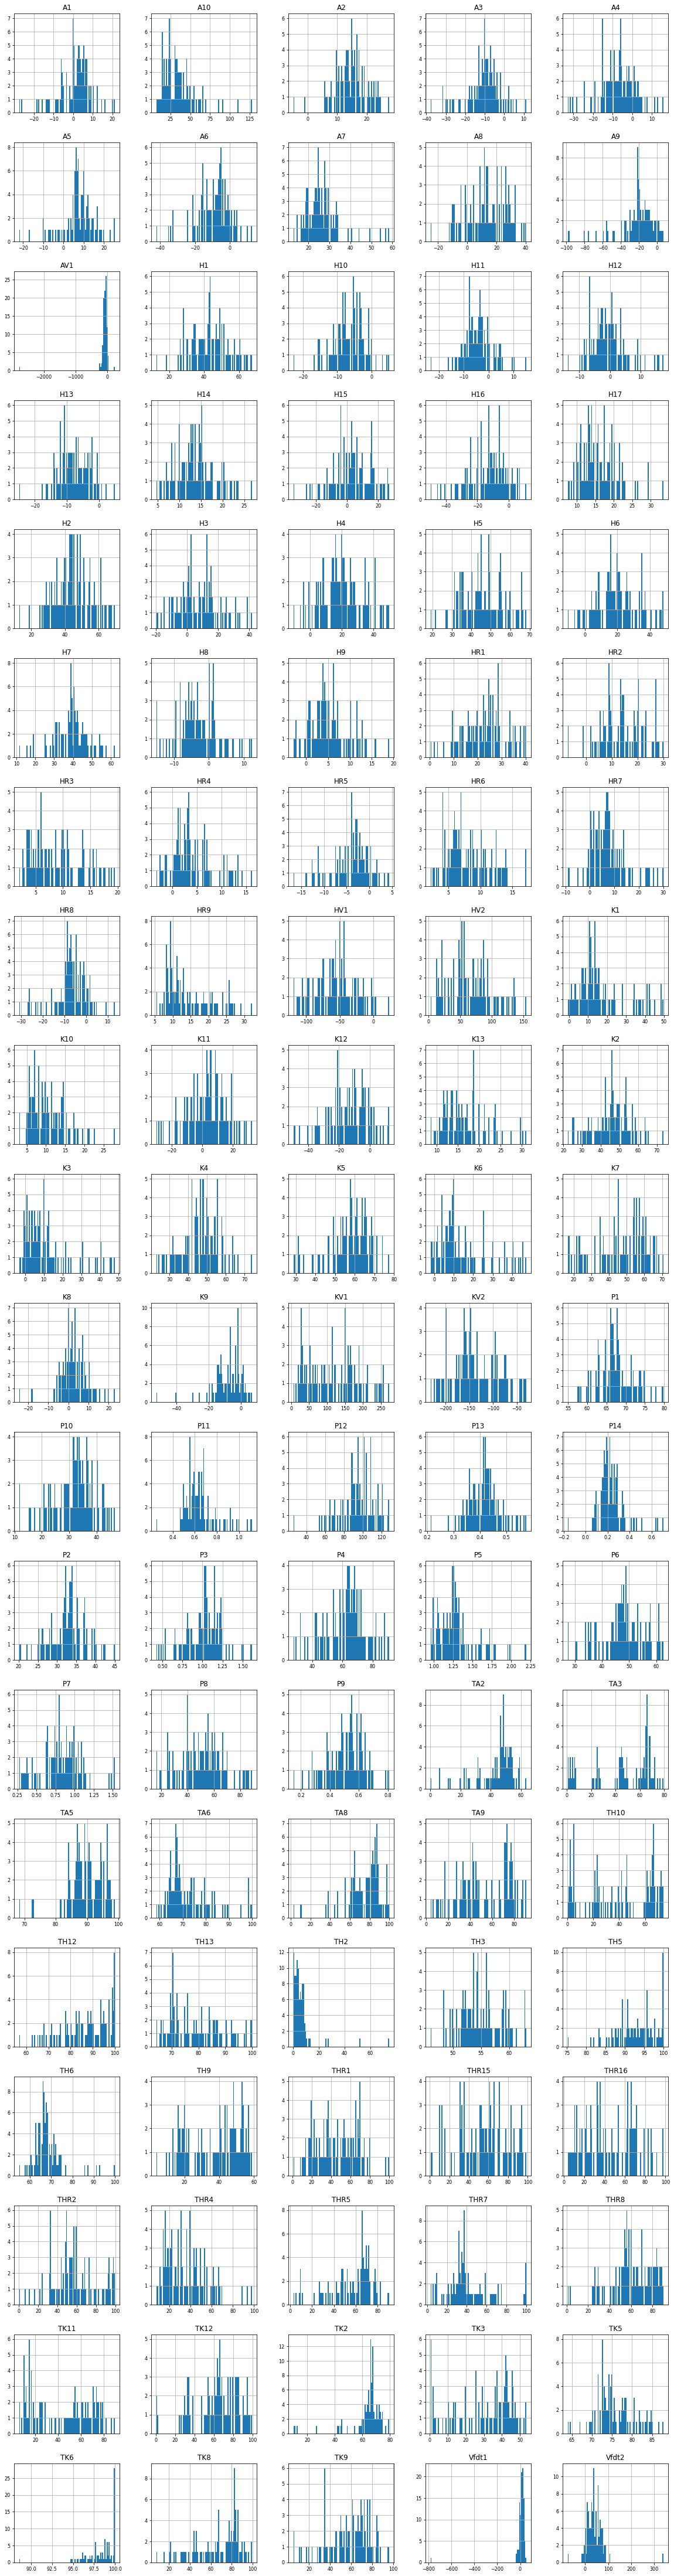

In [10]:
#histogram
Complete_histogram = Dataframe.hist(figsize=(20,80),layout=(20,5), bins = 90, 
                                    column = Dataframe.columns, xlabelsize = 8, ylabelsize = 8)

## Right and Left

In [11]:
Dataframe.head(5)

P1         P2        P3         P4        P5  \
Patients                                                               
M_DR_L002M1NAAA  62.939427  37.060573  0.808100  46.982558  1.290000   
M_IZ_L002M1NAAA  67.182370  32.817630  0.865200  50.302326  1.280000   
M_DR_L002M2NAAA  57.795502  42.204498  1.170233  68.036822  1.158333   
M_IZ_L002M2NAAA  62.615632  37.384368  1.116753  64.927519  1.185000   
M_DR_L022M1NAAA  66.656806  33.343194  0.793240  45.328000  1.258333   

                        P6        P7         P8        P9        P10  \
Patients                                                               
M_DR_L002M1NAAA  46.565346  0.628290  36.528477  0.387120  22.506977   
M_IZ_L002M1NAAA  46.904616  0.675437  39.269578  0.456413  26.535659   
M_DR_L002M2NAAA  51.884896  1.011775  58.824138  0.545543  31.717636   
M_IZ_L002M2NAAA  50.658932  0.942554  54.799654  0.585027  34.013178   
M_DR_L022M1NAAA  47.719076  0.629609  35.977656  0.365830  20.904571   

                      P11         P12       P13       P14        HV1  \
Patients                                                               
M_DR_L002M1NAAA  0.665000   90.270263  0.420000  0.203333 -50.426812   
M_IZ_L002M1NAAA  0.623333   96.367229  0.476667  0.188333 -64.943045   
M_DR_L002M2NAAA  0.578333  103.933130  0.443333  0.166667 -80.752790   
M_IZ_L002M2NAAA  0.610000   98.373984  0.488333  0.090000 -89.992005   
M_DR_L022M1NAAA  0.586667  102.303976  0.435000  0.243333 -43.776753   

                       HV2         KV1         KV2         AV1      Vfdt1  \
Patients                                                                    
M_DR_L002M1NAAA  48.577973   35.941583  -29.979234  -52.914337  20.556150   
M_IZ_L002M1NAAA  82.060669  148.180082  -93.381112  -86.162162  15.373675   
M_DR_L002M2NAAA  87.281707  104.920805  -41.142917  -79.064595   9.458853   
M_IZ_L002M2NAAA  87.076785  163.870160  -98.302135 -112.325769  21.863426   
M_DR_L022M1NAAA  71.587973  158.953706 -140.121832  -34.879469  21.313961   

                     Vfdt2        HR1        HR2       HR3       THR1  \
Patients                                                                
M_DR_L002M1NAAA  15.670808  13.911333   4.891333  9.020000  65.314417   
M_IZ_L002M1NAAA  68.845202  12.732667   4.039000  8.693667  16.581212   
M_DR_L002M2NAAA  37.565107  16.320333   6.492000  9.828333  51.723752   
M_IZ_L002M2NAAA  60.706636  16.310667   7.472667  8.838000  28.252204   
M_DR_L022M1NAAA  31.639737  25.479667  19.845667  5.634000  12.911166   

                      THR2       HR4       HR5       HR6       THR4  \
Patients                                                              
M_DR_L002M1NAAA  65.493083  3.427333 -0.712000  4.139333  43.864871   
M_IZ_L002M1NAAA  49.826773  1.167000 -3.846667  5.013667  64.465667   
M_DR_L002M2NAAA  80.010372  3.605667 -3.042667  6.648333  36.441226   
M_IZ_L002M2NAAA  57.899666  2.486000 -3.813667  6.299667  45.597154   
M_DR_L022M1NAAA  53.605487  1.592667 -1.833000  3.425667  66.332156   

                      THR5       HR7       HR8        HR9       THR7  \
Patients                                                               
M_DR_L002M1NAAA  50.101670  6.104333 -6.724000  12.828333  37.747067   
M_IZ_L002M1NAAA  10.877351  6.602667 -8.045333  14.648000  58.553946   
M_DR_L002M2NAAA   8.800351  3.858333 -6.792667  10.651000  48.513463   
M_IZ_L002M2NAAA  90.769699  7.017000 -2.361333   9.378333  22.665109   
M_DR_L022M1NAAA  47.554377  1.527667 -6.726667   8.254333  16.654595   

                      THR8         H1         H2         H3         H4  \
Patients                                                                 
M_DR_L002M1NAAA  81.764006  27.918333  29.272333   2.820333   5.503667   
M_IZ_L002M1NAAA  29.210998  35.185000  35.448667  -2.369667   7.823000   
M_DR_L002M2NAAA  67.591418  33.288667  34.551333  -4.308667  -0.959000   
M_IZ_L002M2NAAA  60.157482  37.996667  40.337667  -6.672333   1.141333   
M_DR_L022M

In [12]:
print(len(Dataframe.index))
Right = []
Left = []
for i in Dataframe.index:
    if i[0:4] == 'M_DR':
        Right.append(i)
    else:
        Left.append(i)
print(len(Right))
print(len(Left))

98
49
49


In [13]:
database_right = Dataframe.loc[Right]
database_left = Dataframe.loc[Left]

print(database_right.shape, database_left.shape)

(49, 100) (49, 100)


In [14]:
for i in database_left.index:
    index = 'M_DR' + i[4:]
    print(i, '', index)
    if index in database_right.index:
        print('Checked')
    else:
        print('Error : ', i)

M_IZ_L002M1NAAA  M_DR_L002M1NAAA
Checked
M_IZ_L002M2NAAA  M_DR_L002M2NAAA
Checked
M_IZ_L022M1NAAA  M_DR_L022M1NAAA
Checked
M_IZ_L031M1NAAA  M_DR_L031M1NAAA
Checked
M_IZ_L031M3NAAA  M_DR_L031M3NAAA
Checked
M_IZ_L034M1NAAA  M_DR_L034M1NAAA
Checked
M_IZ_L035M1NAAA  M_DR_L035M1NAAA
Checked
M_IZ_L036M1NAAA  M_DR_L036M1NAAA
Checked
M_IZ_L038M1NAAA  M_DR_L038M1NAAA
Checked
M_IZ_L040M1NAAA  M_DR_L040M1NAAA
Checked
M_IZ_L041M1NAAA  M_DR_L041M1NAAA
Checked
M_IZ_L043M2NAAA  M_DR_L043M2NAAA
Checked
M_IZ_L043M3NAAA  M_DR_L043M3NAAA
Checked
M_IZ_L050M1NAAA  M_DR_L050M1NAAA
Checked
M_IZ_L052M2NAAA  M_DR_L052M2NAAA
Checked
M_IZ_L059M1NAAA  M_DR_L059M1NAAA
Checked
M_IZ_L060M1NAAA  M_DR_L060M1NAAA
Checked
M_IZ_L076M3NAAA  M_DR_L076M3NAAA
Checked
M_IZ_L077M1NAAA  M_DR_L077M1NAAA
Checked
M_IZ_L080M1NAAA  M_DR_L080M1NAAA
Checked
M_IZ_L085M2NAAA  M_DR_L085M2NAAA
Checked
M_IZ_L091M2NAAA  M_DR_L091M2NAAA
Checked
M_IZ_L139M1NAAA  M_DR_L139M1NAAA
Checked
M_IZ_L148M1NAAA  M_DR_L148M1NAAA
Checked
M_IZ_L148M6NAAA 

In [15]:
index = database_left.index 
index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [16]:
index = database_right.index 
index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [17]:
database_right.head(2)

P1         P2        P3         P4        P5  \
Patients                                                               
M_DR_L002M1NAAA  62.939427  37.060573  0.808100  46.982558  1.290000   
M_DR_L002M2NAAA  57.795502  42.204498  1.170233  68.036822  1.158333   

                        P6        P7         P8        P9        P10  \
Patients                                                               
M_DR_L002M1NAAA  46.565346  0.628290  36.528477  0.387120  22.506977   
M_DR_L002M2NAAA  51.884896  1.011775  58.824138  0.545543  31.717636   

                      P11         P12       P13       P14        HV1  \
Patients                                                               
M_DR_L002M1NAAA  0.665000   90.270263  0.420000  0.203333 -50.426812   
M_DR_L002M2NAAA  0.578333  103.933130  0.443333  0.166667 -80.752790   

                       HV2         KV1        KV2        AV1      Vfdt1  \
Patients                                                                  
M_DR_L002M1NAAA  48.577973   35.941583 -29.979234 -52.914337  20.556150   
M_DR_L002M2NAAA  87.281707  104.920805 -41.142917 -79.064595   9.458853   

                     Vfdt2        HR1       HR2       HR3       THR1  \
Patients                                                               
M_DR_L002M1NAAA  15.670808  13.911333  4.891333  9.020000  65.314417   
M_DR_L002M2NAAA  37.565107  16.320333  6.492000  9.828333  51.723752   

                      THR2       HR4       HR5       HR6       THR4  \
Patients                                                              
M_DR_L002M1NAAA  65.493083  3.427333 -0.712000  4.139333  43.864871   
M_DR_L002M2NAAA  80.010372  3.605667 -3.042667  6.648333  36.441226   

                      THR5       HR7       HR8        HR9       THR7  \
Patients                                                               
M_DR_L002M1NAAA  50.101670  6.104333 -6.724000  12.828333  37.747067   
M_DR_L002M2NAAA   8.800351  3.858333 -6.792667  10.651000  48.513463   

                      THR8         H1         H2        H3        H4  \
Patients                                                               
M_DR_L002M1NAAA  81.764006  27.918333  29.272333  2.820333  5.503667   
M_DR_L002M2NAAA  67.591418  33.288667  34.551333 -4.308667 -0.959000   

                        H5        H6         H7       TH2        TH3  \
Patients                                                               
M_DR_L002M1NAAA  32.282333  5.443000  29.462000  5.319579  56.005197   
M_DR_L002M2NAAA  40.204667 -1.197333  44.513333  4.555078  51.619632   

                       TH5        TH6        H8        H9       H10       H11  \
Patients                                                                        
M_DR_L002M1NAAA  92.179787  63.723740 -2.564667  3.740667 -3.058667  2.913333   
M_DR_L002M2NAAA  95.663640  60.585517 -3.554333  5.323000 -4.894333  3.798333   

                      H12    H13        H14        TH9      TH10      TH12  \
Patients                                                                     
M_DR_L002M1NAAA  2.956667 -2.538   7.075667  52.599067  4.951658  63.72374   
M_DR_L002M2NAAA  4.334000 -2.834  10.309667  47.247676  4.804285  65.34507   

                      TH13        H15        H16        H17      THR15  \
Patients                                                                 
M_DR_L002M1NAAA  92.814745  -2.036000 -14.436667  12.400667  69.604868   
M_DR_L002M2NAAA  93.741497  15.168333   1.602667  13.565667  53.927749   

                     THR16         K1         K2         K3         K4  \
Patients                                                                 
M_DR_L002M1NAAA  12.699688  18.315667  25.781667  12.124000  24.550667   
M_DR_L002M2NAAA  12.218556  13.859667  25.089667   6.982667  25.876333   

                        K5      K6         K7        TK2        TK3  \
Patients                                                              
M_DR_L002M1NAAA  28.845667  18.847  16.72

In [18]:
# Right histogram
Right_histogram = database_right.hist(figsize=(20,80),layout=(20,5), bins = 50, 
                                    column = database_right.columns, xlabelsize = 8, ylabelsize = 8)

In [19]:
database_left.head(2)

P1         P2        P3         P4     P5         P6  \
Patients                                                                       
M_IZ_L002M1NAAA  67.182370  32.817630  0.865200  50.302326  1.280  46.904616   
M_IZ_L002M2NAAA  62.615632  37.384368  1.116753  64.927519  1.185  50.658932   

                       P7         P8        P9        P10       P11  \
Patients                                                              
M_IZ_L002M1NAAA  0.675437  39.269578  0.456413  26.535659  0.623333   
M_IZ_L002M2NAAA  0.942554  54.799654  0.585027  34.013178  0.610000   

                       P12       P13       P14        HV1        HV2  \
Patients                                                               
M_IZ_L002M1NAAA  96.367229  0.476667  0.188333 -64.943045  82.060669   
M_IZ_L002M2NAAA  98.373984  0.488333  0.090000 -89.992005  87.076785   

                        KV1        KV2         AV1      Vfdt1      Vfdt2  \
Patients                                                                   
M_IZ_L002M1NAAA  148.180082 -93.381112  -86.162162  15.373675  68.845202   
M_IZ_L002M2NAAA  163.870160 -98.302135 -112.325769  21.863426  60.706636   

                       HR1       HR2       HR3       THR1       THR2    HR4  \
Patients                                                                      
M_IZ_L002M1NAAA  12.732667  4.039000  8.693667  16.581212  49.826773  1.167   
M_IZ_L002M2NAAA  16.310667  7.472667  8.838000  28.252204  57.899666  2.486   

                      HR5       HR6       THR4       THR5       HR7       HR8  \
Patients                                                                        
M_IZ_L002M1NAAA -3.846667  5.013667  64.465667  10.877351  6.602667 -8.045333   
M_IZ_L002M2NAAA -3.813667  6.299667  45.597154  90.769699  7.017000 -2.361333   

                       HR9       THR7       THR8         H1         H2  \
Patients                                                                 
M_IZ_L002M1NAAA  14.648000  58.553946  29.210998  35.185000  35.448667   
M_IZ_L002M2NAAA   9.378333  22.665109  60.157482  37.996667  40.337667   

                       H3        H4         H5        H6      H7       TH2  \
Patients                                                                     
M_IZ_L002M1NAAA -2.369667  7.823000  36.402667  7.823000  40.371  1.317523   
M_IZ_L002M2NAAA -6.672333  1.141333  35.394667  1.141333  47.010  5.325627   

                       TH3        TH5        TH6        H8        H9  \
Patients                                                               
M_IZ_L002M1NAAA  56.572909  88.970343  67.182370 -3.546333  0.254667   
M_IZ_L002M2NAAA  52.904906  91.857129  62.615632 -9.335000  0.296333   

                      H10       H11    H12       H13        H14        TH9  \
Patients                                                                     
M_IZ_L002M1NAAA -6.599000 -5.194667 -2.978 -9.322333   9.712667  56.002198   
M_IZ_L002M2NAAA -9.662667 -3.245000 -3.245 -8.617667  10.013667  53.984803   

                      TH10       TH12       TH13       H15        H16     H17  \
Patients                                                                        
M_IZ_L002M1NAAA  34.233008  84.048654  76.009327 -3.850333 -17.192333  13.342   
M_IZ_L002M2NAAA   2.366543  62.615632  84.055590 -2.713667 -15.864667  13.151   

                     THR15      THR16      K1         K2         K3      K4  \
Patients                                                                      
M_IZ_L002M1NAAA  54.019947  34.866632  23.634  42.790333  14.276667  43.693   
M_IZ_L002M2NAAA  33.045994  26.148181  15.458  31.987667   3.170333  31.440   

                        K5         K6         K7        TK2        TK3  \
Patients                                                                 
M_IZ_L002M1NAAA  53.982000  16.614667  40.413333  66.791498  41.942745   
M_IZ_L002M2NAAA  46.383333   9.533667  43.213000  45.386752  41.662209   

                       TK5     

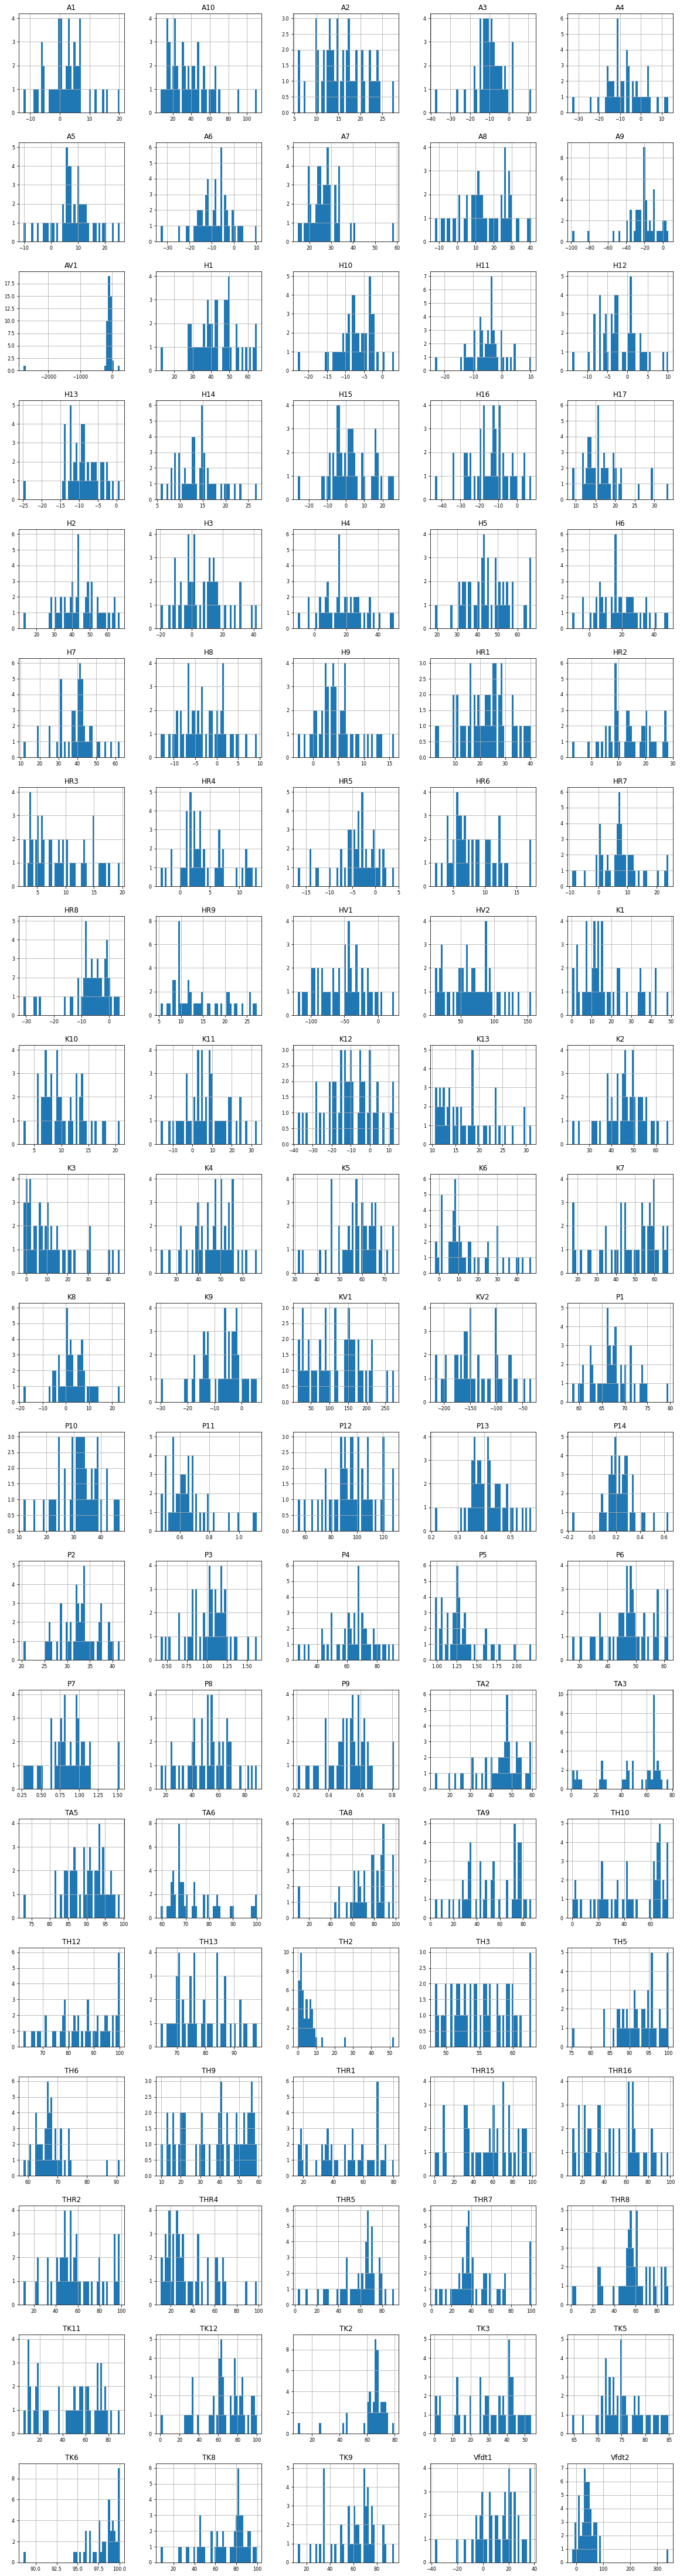

In [20]:
# Left histogram
Left_histogram = database_left.hist(figsize=(20,80),layout=(20,5), bins = 50, 
                                    column = database_left.columns, xlabelsize = 8, ylabelsize = 8)

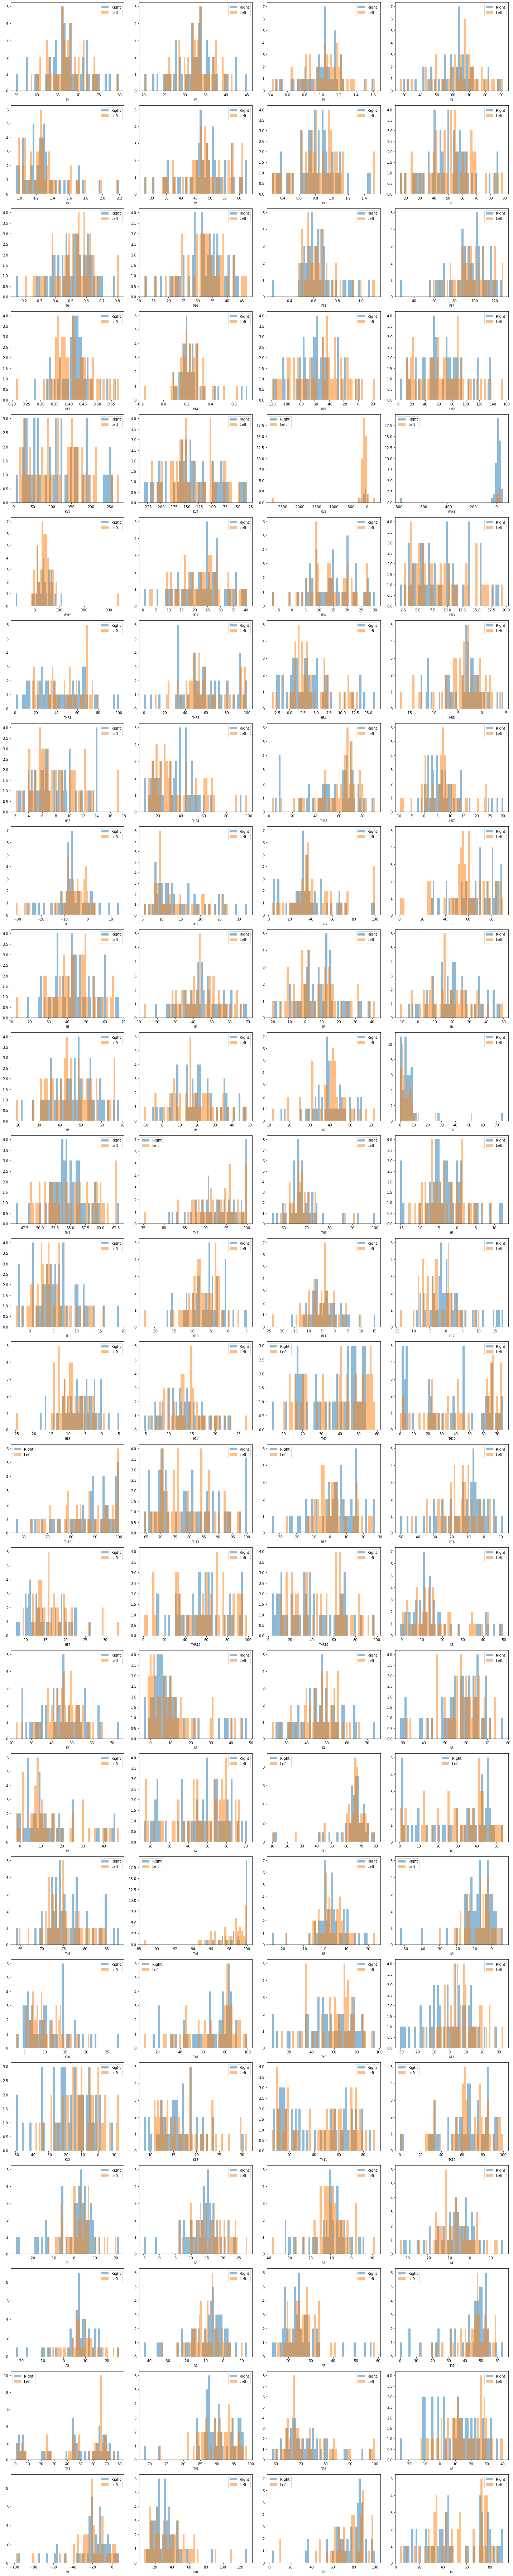

In [21]:
# Both histogram
plt.figure(figsize = (20,100))
i = 1
for feature in Dataframe.columns:
    plt.subplot(25,4,i)
    plt.hist(database_right[feature], bins = 50, alpha=0.5, label = "Right")
    plt.hist(database_left[feature] , bins = 50, alpha=0.5, label = "Left")
    plt.legend(prop={"size":10})
    plt.xlabel(feature, fontsize = 8)
    i += 1
plt.tight_layout()
plt.show()

# Clustering

### Right

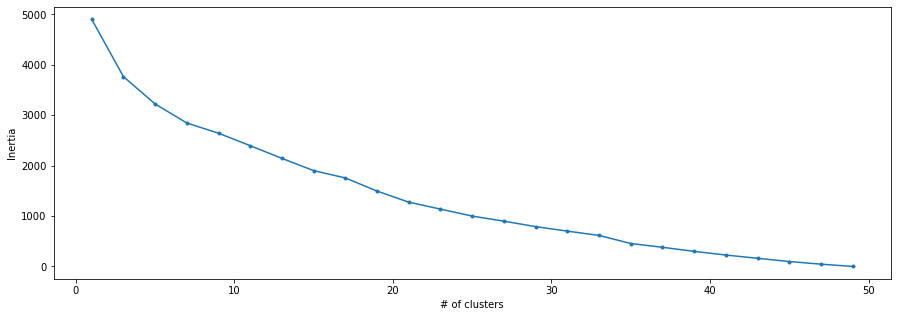

In [22]:
X1 = database_right.values
X1 = StandardScaler().fit_transform(X1)

plt.figure(figsize = (15,5))
K = range(1,50,2)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

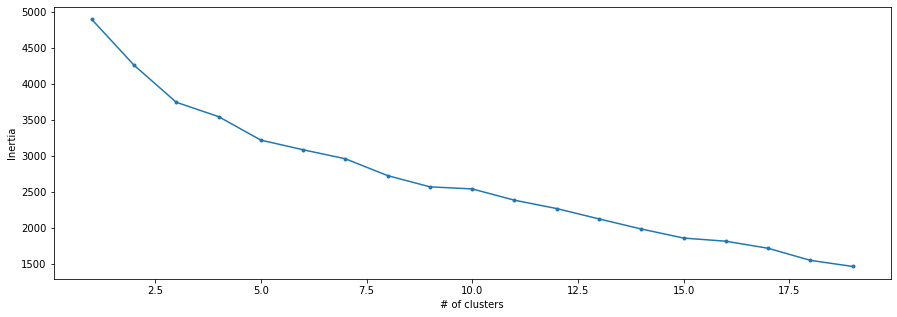

In [23]:
plt.figure(figsize = (15,5))
K = range(1,20,1)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
k = [2,3,4,5,6,7,8,9,10]
for n_clusters in k:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_right = kmeans.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, cluster_labels_right)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.21113404465142654
For n_clusters = 3 The average silhouette_score is : 0.12339573264323313
For n_clusters = 4 The average silhouette_score is : 0.12224319071345009
For n_clusters = 5 The average silhouette_score is : 0.1138090132228049
For n_clusters = 6 The average silhouette_score is : 0.10900905029465631
For n_clusters = 7 The average silhouette_score is : 0.12187313493804852
For n_clusters = 8 The average silhouette_score is : 0.0936199967760573
For n_clusters = 9 The average silhouette_score is : 0.09543972082940516
For n_clusters = 10 The average silhouette_score is : 0.10948408175446532


In [25]:
k_s = 3

kmeans = KMeans(n_clusters = k_s).fit(X1)
centroids = kmeans.cluster_centers_
cluster_labels_right = kmeans.labels_

database_right['cluster_labels'] = cluster_labels_right
columns_of_interest = database_right.columns
print(cluster_labels_right)
database_right.head()

[1 2 1 1 2 2 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 2 0 0 0 0 0 2 2 1 2 1 1 2
 1 2 2 1 2 2 2 1 2 2 2 1]


P1         P2        P3         P4        P5  \
Patients                                                               
M_DR_L002M1NAAA  62.939427  37.060573  0.808100  46.982558  1.290000   
M_DR_L002M2NAAA  57.795502  42.204498  1.170233  68.036822  1.158333   
M_DR_L022M1NAAA  66.656806  33.343194  0.793240  45.328000  1.258333   
M_DR_L031M1NAAA  66.041667  33.958333  0.871083  54.785115  1.380000   
M_DR_L031M3NAAA  68.096133  31.903867  1.048997  66.392194  1.138333   

                        P6        P7         P8        P9        P10  \
Patients                                                               
M_DR_L002M1NAAA  46.565346  0.628290  36.528477  0.387120  22.506977   
M_DR_L002M2NAAA  51.884896  1.011775  58.824138  0.545543  31.717636   
M_DR_L022M1NAAA  47.719076  0.629609  35.977656  0.365830  20.904571   
M_DR_L031M1NAAA  43.518519  0.631863  39.739809  0.458607  28.843187   
M_DR_L031M3NAAA  52.752116  0.921271  58.308268  0.559047  35.382700   

                      P11         P12       P13       P14        HV1  \
Patients                                                               
M_DR_L002M1NAAA  0.665000   90.270263  0.420000  0.203333 -50.426812   
M_DR_L002M2NAAA  0.578333  103.933130  0.443333  0.166667 -80.752790   
M_DR_L022M1NAAA  0.586667  102.303976  0.435000  0.243333 -43.776753   
M_DR_L031M1NAAA  0.680000   88.272921  0.460000  0.223333 -45.005464   
M_DR_L031M3NAAA  0.593333  101.182939  0.370000  0.183333 -75.459986   

                       HV2         KV1         KV2         AV1      Vfdt1  \
Patients                                                                    
M_DR_L002M1NAAA  48.577973   35.941583  -29.979234  -52.914337  20.556150   
M_DR_L002M2NAAA  87.281707  104.920805  -41.142917  -79.064595   9.458853   
M_DR_L022M1NAAA  71.587973  158.953706 -140.121832  -34.879469  21.313961   
M_DR_L031M1NAAA  58.093215  133.003003 -132.911973 -125.388381  36.185912   
M_DR_L031M3NAAA  57.155524  121.728584 -171.502166  -71.571088  33.411732   

                     Vfdt2        HR1        HR2       HR3       THR1  \
Patients                                                                
M_DR_L002M1NAAA  15.670808  13.911333   4.891333  9.020000  65.314417   
M_DR_L002M2NAAA  37.565107  16.320333   6.492000  9.828333  51.723752   
M_DR_L022M1NAAA  31.639737  25.479667  19.845667  5.634000  12.911166   
M_DR_L031M1NAAA  47.903338  19.515667  13.443667  6.072000  24.112654   
M_DR_L031M3NAAA  73.170372  23.215000  17.217333  5.997667  70.123006   

                      THR2       HR4       HR5       HR6       THR4  \
Patients                                                              
M_DR_L002M1NAAA  65.493083  3.427333 -0.712000  4.139333  43.864871   
M_DR_L002M2NAAA  80.010372  3.605667 -3.042667  6.648333  36.441226   
M_DR_L022M1NAAA  53.605487  1.592667 -1.833000  3.425667  66.332156   
M_DR_L031M1NAAA  89.899691  0.346333 -6.373333  6.719667   7.746914   
M_DR_L031M3NAAA   0.146843  1.101333 -7.426333  8.527667  21.650874   

                      THR5       HR7       HR8        HR9       THR7  \
Patients                                                               
M_DR_L002M1NAAA  50.101670  6.104333 -6.724000  12.828333  37.747067   
M_DR_L002M2NAAA   8.800351  3.858333 -6.792667  10.651000  48.513463   
M_DR_L022M1NAAA  47.554377  1.527667 -6.726667   8.254333  16.654595   
M_DR_L031M1NAAA  66.095679  3.768333 -4.587333   8.355667  27.037037   
M_DR_L031M3NAAA  70.436309  3.655333 -7.678000  11.333333  32.510855   

                      THR8         H1         H2         H3         H4  \
Patients                                                                 
M_DR_L002M1NAAA  81.764006  27.918333  29.272333   2.820333   5.503667   
M_DR_L002M2NAAA  67.591418  33.288667  34.551333  -4.308667  -0.959000   
M_DR_L022M1NAAA  81.193479  44.707333  44.719000  13.136333  20.009000   
M_DR_L031M1NAAA  63.919753  37.999000  38.286333   7.829333  18.358000   
M_DR_L031M

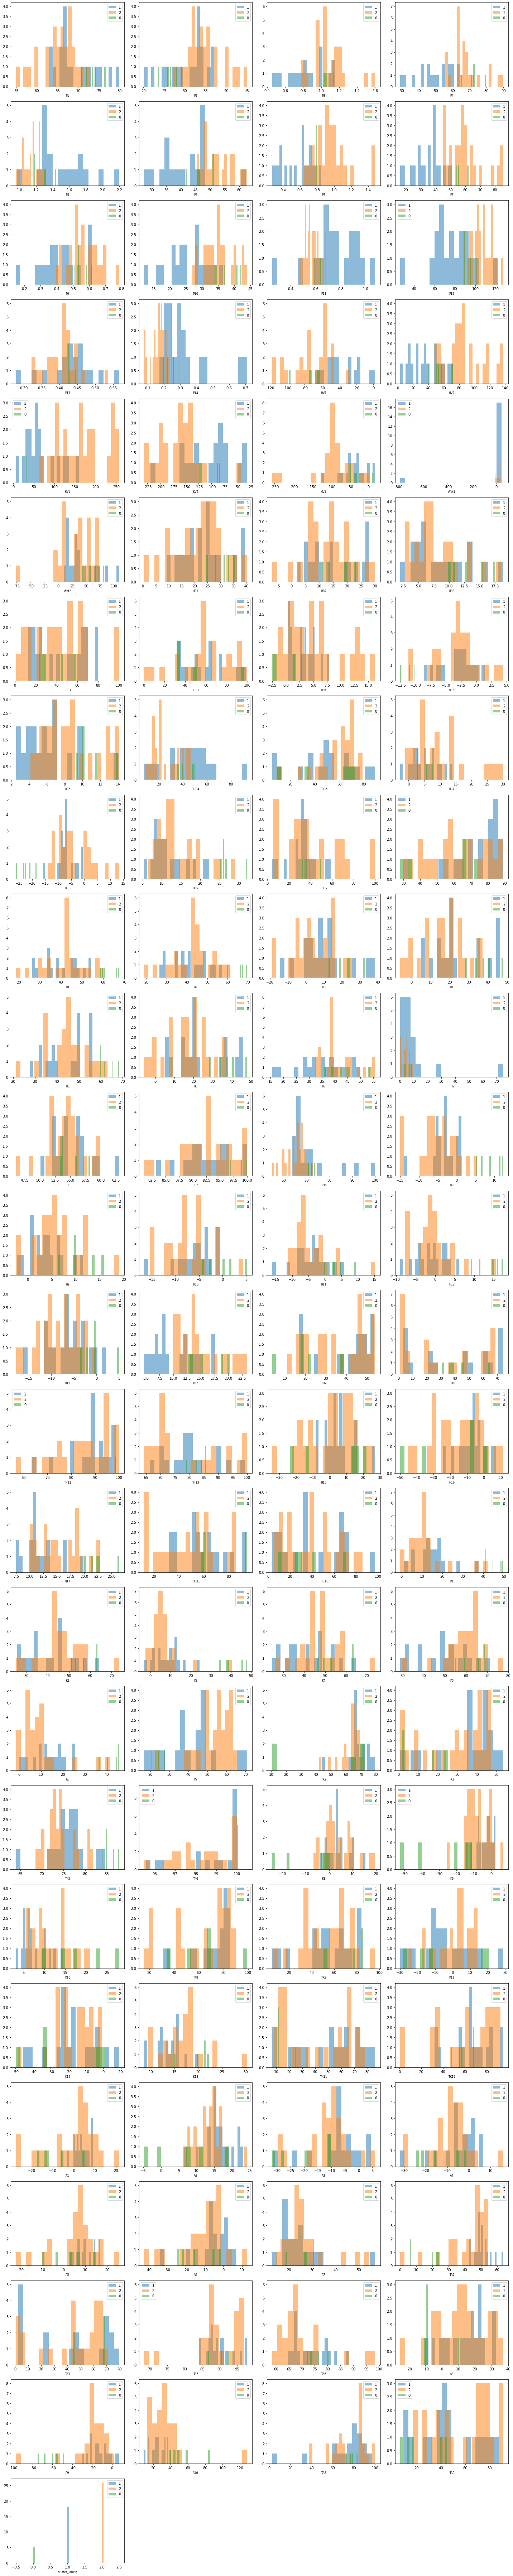

In [29]:
plt.figure(figsize = (20,100))
i = 1
for feature in database_right.columns:
    plt.subplot(26,4,i)
    for j in database_right['cluster_labels'].unique():
        plt.hist(database_right[database_right.cluster_labels == j][feature], bins = 20, alpha=0.5, 
                 label = j)
    plt.xlabel(feature, fontsize = 8)
    plt.legend(prop={"size":10})
    i += 1
plt.tight_layout()
plt.show()

### Left

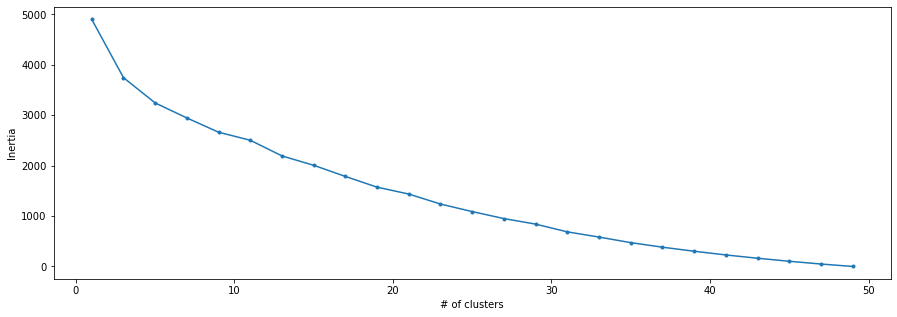

In [30]:
X1 = database_left.values
X1 = StandardScaler().fit_transform(X1)

plt.figure(figsize = (15,5))
K = range(1,50,2)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

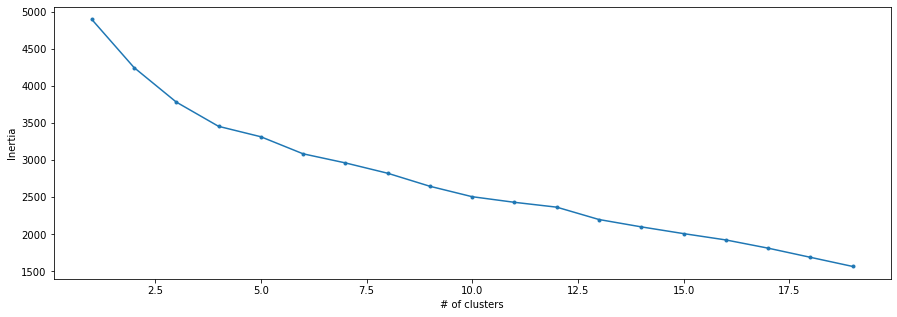

In [31]:
plt.figure(figsize = (15,5))
K = range(1,20,1)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
k = [2,3,4,5,6,7,8,9,10]
for n_clusters in k:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_left = kmeans.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, cluster_labels_left)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.16419158078425838
For n_clusters = 3 The average silhouette_score is : 0.14446195174478965
For n_clusters = 4 The average silhouette_score is : 0.12194625373095297
For n_clusters = 5 The average silhouette_score is : 0.10850280627358942
For n_clusters = 6 The average silhouette_score is : 0.06250381665467944
For n_clusters = 7 The average silhouette_score is : 0.06942511433788516
For n_clusters = 8 The average silhouette_score is : 0.07593981403149065
For n_clusters = 9 The average silhouette_score is : 0.07257079611385467
For n_clusters = 10 The average silhouette_score is : 0.07960467573606761


In [33]:
k_s = 3

kmeans = KMeans(n_clusters = k_s).fit(X1)
centroids = kmeans.cluster_centers_
cluster_labels_left = kmeans.labels_

database_left['cluster_labels'] = cluster_labels_left
columns_of_interest = database_left.columns
print(cluster_labels_left)
database_left.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 2 2 2 1 1 1 1 1 0 0 2 0 2 2 0
 2 0 0 0 0 1 0 2 0 0 0 2]


P1         P2        P3         P4        P5  \
Patients                                                               
M_IZ_L002M1NAAA  67.182370  32.817630  0.865200  50.302326  1.280000   
M_IZ_L002M2NAAA  62.615632  37.384368  1.116753  64.927519  1.185000   
M_IZ_L022M1NAAA  66.183206  33.816794  0.824777  47.130095  1.290000   
M_IZ_L031M1NAAA  66.190476  33.809524  0.862197  54.226205  1.358333   
M_IZ_L031M3NAAA  67.723138  32.276862  1.097733  69.476793  1.146667   

                        P6        P7         P8        P9        P10  \
Patients                                                               
M_IZ_L002M1NAAA  46.904616  0.675437  39.269578  0.456413  26.535659   
M_IZ_L002M2NAAA  50.658932  0.942554  54.799654  0.585027  34.013178   
M_IZ_L022M1NAAA  46.534351  0.640877  36.621527  0.406320  23.218286   
M_IZ_L031M1NAAA  44.224197  0.636857  40.053913  0.430350  27.066038   
M_IZ_L031M3NAAA  52.336464  0.957235  60.584523  0.538687  34.094093   

                      P11         P12       P13       P14        HV1  \
Patients                                                               
M_IZ_L002M1NAAA  0.623333   96.367229  0.476667  0.188333 -64.943045   
M_IZ_L002M2NAAA  0.610000   98.373984  0.488333  0.090000 -89.992005   
M_IZ_L022M1NAAA  0.678333   88.650584  0.420000  0.166667 -31.681045   
M_IZ_L031M1NAAA  0.683333   88.099288  0.468333  0.211667 -44.098492   
M_IZ_L031M3NAAA  0.553333  108.435708  0.363333  0.230000 -84.154538   

                       HV2         KV1         KV2         AV1      Vfdt1  \
Patients                                                                    
M_IZ_L002M1NAAA  82.060669  148.180082  -93.381112  -86.162162  15.373675   
M_IZ_L002M2NAAA  87.076785  163.870160  -98.302135 -112.325769  21.863426   
M_IZ_L022M1NAAA  51.505085  139.169216 -157.924035  -56.064145  20.848420   
M_IZ_L031M1NAAA  58.931467  150.406778 -142.667841 -141.918544  28.106812   
M_IZ_L031M3NAAA  68.222663  149.111112 -217.078545  -83.763974   1.590823   

                     Vfdt2        HR1        HR2       HR3       THR1  \
Patients                                                                
M_IZ_L002M1NAAA  68.845202  12.732667   4.039000  8.693667  16.581212   
M_IZ_L002M2NAAA  60.706636  16.310667   7.472667  8.838000  28.252204   
M_IZ_L022M1NAAA  55.993016  25.191333  19.507667  5.683667  52.933333   
M_IZ_L031M1NAAA  74.930006  19.220333  13.939000  5.281333  37.129376   
M_IZ_L031M3NAAA  29.342872  23.238333  17.920000  5.318333  38.898136   

                      THR2       HR4       HR5        HR6       THR4  \
Patients                                                               
M_IZ_L002M1NAAA  49.826773  1.167000 -3.846667   5.013667  64.465667   
M_IZ_L002M2NAAA  57.899666  2.486000 -3.813667   6.299667  45.597154   
M_IZ_L022M1NAAA  36.770483  2.492000 -1.671667   4.163667  19.032061   
M_IZ_L031M1NAAA  60.887066  6.258333 -0.375333   6.633667  16.472811   
M_IZ_L031M3NAAA  67.938988  7.426333 -2.863667  10.290000  22.387925   

                      THR5       HR7       HR8        HR9       THR7  \
Patients                                                               
M_IZ_L002M1NAAA  10.877351  6.602667 -8.045333  14.648000  58.553946   
M_IZ_L002M2NAAA  90.769699  7.017000 -2.361333   9.378333  22.665109   
M_IZ_L022M1NAAA  47.964377  7.275000 -1.006333   8.281333  25.218321   
M_IZ_L031M1NAAA  62.024759  5.643667 -4.527000  10.170667  20.647262   
M_IZ_L031M3NAAA  77.288148  7.678000 -6.429333  14.107333  40.686695   

                      THR8         H1         H2         H3         H4  \
Patients                                                                 
M_IZ_L002M1NAAA  29.210998  35.185000  35.448667  -2.369667   7.823000   
M_IZ_L002M2NAAA  60.157482  37.996667  40.337667  -6.672333   1.141333   
M_IZ_L022M1NAAA  73.237659  39.687000  39.756000  12.827000  18.329000   
M_IZ_L031M1NAAA  76.855016  35.659000  36.084000   7.848000  19.348667   
M_I

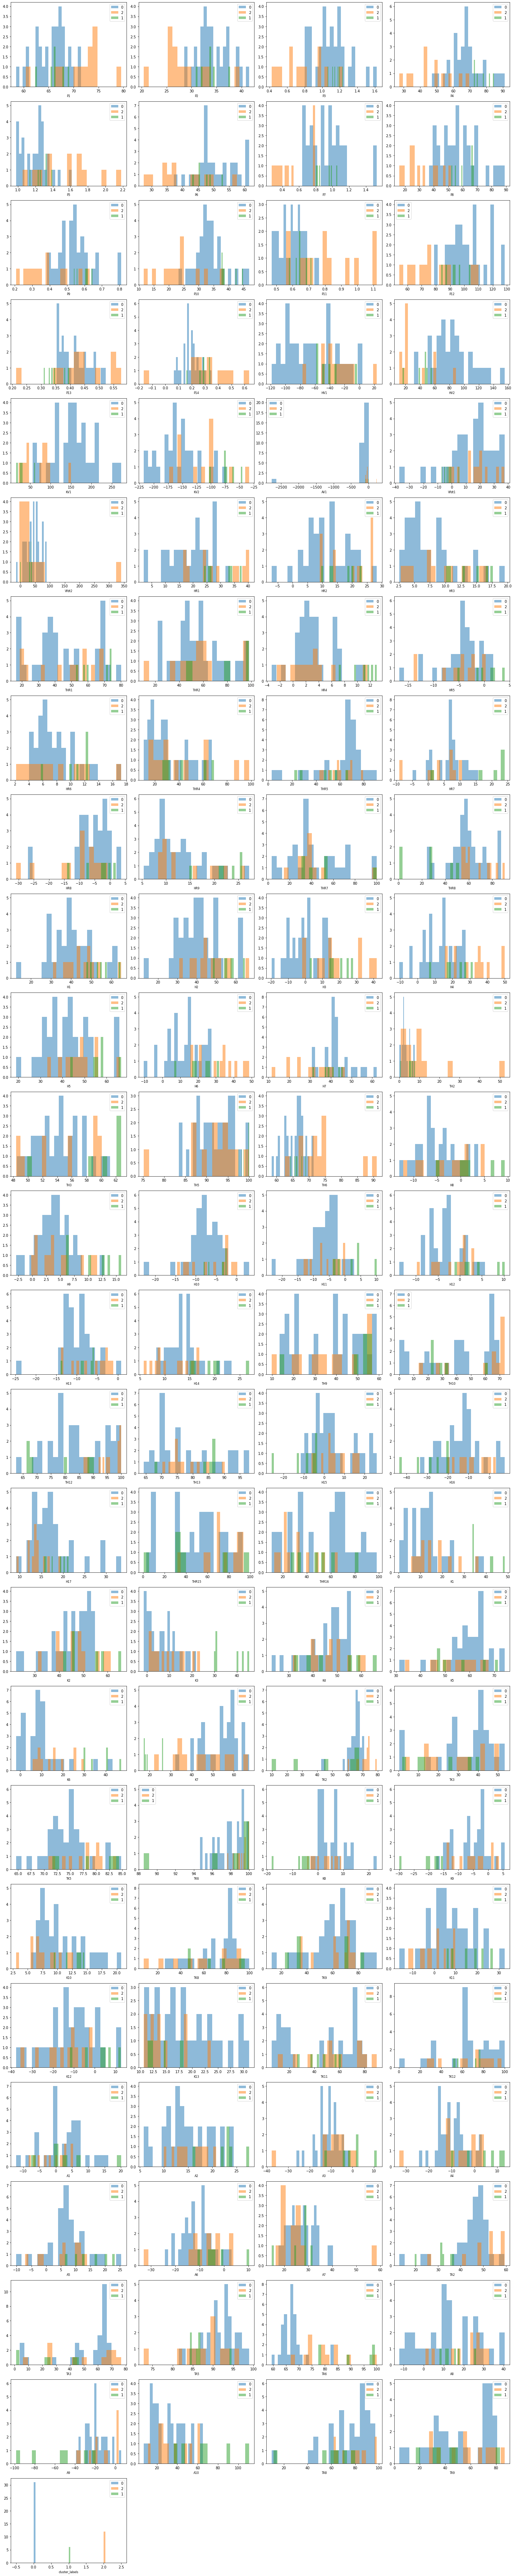

In [35]:
plt.figure(figsize = (20,100))
i = 1
for feature in database_left.columns:
    plt.subplot(26,4,i)
    for j in database_left['cluster_labels'].unique():
        plt.hist(database_left[database_left.cluster_labels == j][feature], bins = 20, alpha=0.5, 
                 label = j)
    plt.xlabel(feature, fontsize = 8)
    plt.legend(prop={"size":10})
    i += 1
plt.tight_layout()
plt.show()

In [ ]:
#cluster_labels_left_new = []
#for i in cluster_labels_left:
#    if i == 0:
#        cluster_labels_left_new.append(0)
#    elif i == 2:
#        cluster_labels_left_new.append(1)
#    else:
#        cluster_labels_left_new.append(2)
#print(cluster_labels_left_new)
#
#cluster_labels_right_new = []
#for i in cluster_labels_right:
#    if i == 0:
#        cluster_labels_right_new.append(0)
#    elif i == 1:
#        cluster_labels_right_new.append(1)
#    else:
#        cluster_labels_right_new.append(2)
#print(cluster_labels_right_new)

## Comparison

In [36]:
for i in zip(cluster_labels_right,cluster_labels_left):
    print('Right : ', i[0], ' , Left : ', i[1])

Right :  1  , Left :  0
Right :  2  , Left :  0
Right :  1  , Left :  0
Right :  1  , Left :  0
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  1  , Left :  0
Right :  1  , Left :  0
Right :  1  , Left :  2
Right :  1  , Left :  0
Right :  2  , Left :  0
Right :  1  , Left :  2
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  1  , Left :  2
Right :  1  , Left :  0
Right :  1  , Left :  2
Right :  2  , Left :  2
Right :  2  , Left :  2
Right :  0  , Left :  1
Right :  0  , Left :  1
Right :  0  , Left :  1
Right :  0  , Left :  1
Right :  0  , Left :  1
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  1  , Left :  2
Right :  2  , Left :  0
Right :  1  , Left :  2
Right :  1  , Left :  2
Right :  2  , Left :  0
Right :  1  , Left :  2
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  1  , Left :  0
Right :  2  , Le

---

## 2º Try of clustering dropping :
### - P3 , 7 and 9

In [37]:
Dataframe_second = Dataframe.copy()
Dataframe_second.head(2)

P1         P2      P3         P4    P5         P6  \
Patients                                                                    
M_DR_L002M1NAAA  62.939427  37.060573  0.8081  46.982558  1.29  46.565346   
M_IZ_L002M1NAAA  67.182370  32.817630  0.8652  50.302326  1.28  46.904616   

                       P7         P8        P9        P10       P11  \
Patients                                                              
M_DR_L002M1NAAA  0.628290  36.528477  0.387120  22.506977  0.665000   
M_IZ_L002M1NAAA  0.675437  39.269578  0.456413  26.535659  0.623333   

                       P12       P13       P14        HV1        HV2  \
Patients                                                               
M_DR_L002M1NAAA  90.270263  0.420000  0.203333 -50.426812  48.577973   
M_IZ_L002M1NAAA  96.367229  0.476667  0.188333 -64.943045  82.060669   

                        KV1        KV2        AV1      Vfdt1      Vfdt2  \
Patients                                                                  
M_DR_L002M1NAAA   35.941583 -29.979234 -52.914337  20.556150  15.670808   
M_IZ_L002M1NAAA  148.180082 -93.381112 -86.162162  15.373675  68.845202   

                       HR1       HR2       HR3       THR1       THR2  \
Patients                                                               
M_DR_L002M1NAAA  13.911333  4.891333  9.020000  65.314417  65.493083   
M_IZ_L002M1NAAA  12.732667  4.039000  8.693667  16.581212  49.826773   

                      HR4       HR5       HR6       THR4       THR5       HR7  \
Patients                                                                        
M_DR_L002M1NAAA  3.427333 -0.712000  4.139333  43.864871  50.101670  6.104333   
M_IZ_L002M1NAAA  1.167000 -3.846667  5.013667  64.465667  10.877351  6.602667   

                      HR8        HR9       THR7       THR8         H1  \
Patients                                                                
M_DR_L002M1NAAA -6.724000  12.828333  37.747067  81.764006  27.918333   
M_IZ_L002M1NAAA -8.045333  14.648000  58.553946  29.210998  35.185000   

                        H2        H3        H4         H5     H6      H7  \
Patients                                                                   
M_DR_L002M1NAAA  29.272333  2.820333  5.503667  32.282333  5.443  29.462   
M_IZ_L002M1NAAA  35.448667 -2.369667  7.823000  36.402667  7.823  40.371   

                      TH2        TH3        TH5       TH6        H8        H9  \
Patients                                                                        
M_DR_L002M1NAAA  5.319579  56.005197  92.179787  63.72374 -2.564667  3.740667   
M_IZ_L002M1NAAA  1.317523  56.572909  88.970343  67.18237 -3.546333  0.254667   

                      H10       H11       H12       H13       H14        TH9  \
Patients                                                                       
M_DR_L002M1NAAA -3.058667  2.913333  2.956667 -2.538000  7.075667  52.599067   
M_IZ_L002M1NAAA -6.599000 -5.194667 -2.978000 -9.322333  9.712667  56.002198   

                      TH10       TH12       TH13       H15        H16  \
Patients                                                                
M_DR_L002M1NAAA   4.951658  63.723740  92.814745 -2.036000 -14.436667   
M_IZ_L002M1NAAA  34.233008  84.048654  76.009327 -3.850333 -17.192333   

                       H17      THR15      THR16         K1         K2  \
Patients                                                                 
M_DR_L002M1NAAA  12.400667  69.604868  12.699688  18.315667  25.781667   
M_IZ_L002M1NAAA  13.342000  54.019947  34.866632  23.634000  42.790333   

                        K3         K4         K5         K6         K7  \
Patients                                                                 
M_DR_L002M1NAAA  12.124000  24.550667  28.845667  18.847000  16.721667   
M_IZ_L002M1NAAA  14.276667  43.693000  53.982000  16.614667  40.413333   

                       TK2        TK3        TK5         TK6        K8  \
Patients             

In [38]:
Dataframe_second.drop(['P3','P7', 'P9'], inplace=True, axis=1)
Dataframe_second.head(0)

Empty DataFrame
Columns: [P1, P2, P4, P5, P6, P8, P10, P11, P12, P13, P14, HV1, HV2, KV1, KV2, AV1, Vfdt1, Vfdt2, HR1, HR2, HR3, THR1, THR2, HR4, HR5, HR6, THR4, THR5, HR7, HR8, HR9, THR7, THR8, H1, H2, H3, H4, H5, H6, H7, TH2, TH3, TH5, TH6, H8, H9, H10, H11, H12, H13, H14, TH9, TH10, TH12, TH13, H15, H16, H17, THR15, THR16, K1, K2, K3, K4, K5, K6, K7, TK2, TK3, TK5, TK6, K8, K9, K10, TK8, TK9, K11, K12, K13, TK11, TK12, A1, A2, A3, A4, A5, A6, A7, TA2, TA3, TA5, TA6, A8, A9, A10, TA8, TA9]
Index: []

In [39]:
Dataframe.head(0)

Empty DataFrame
Columns: [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, HV1, HV2, KV1, KV2, AV1, Vfdt1, Vfdt2, HR1, HR2, HR3, THR1, THR2, HR4, HR5, HR6, THR4, THR5, HR7, HR8, HR9, THR7, THR8, H1, H2, H3, H4, H5, H6, H7, TH2, TH3, TH5, TH6, H8, H9, H10, H11, H12, H13, H14, TH9, TH10, TH12, TH13, H15, H16, H17, THR15, THR16, K1, K2, K3, K4, K5, K6, K7, TK2, TK3, TK5, TK6, K8, K9, K10, TK8, TK9, K11, K12, K13, TK11, TK12, A1, A2, A3, A4, A5, A6, A7, TA2, TA3, TA5, TA6, A8, A9, A10, TA8, TA9]
Index: []

In [40]:
print(len(Dataframe_second.index))
Right = []
Left = []
for i in Dataframe_second.index:
    if i[0:4] == 'M_DR':
        Right.append(i)
    else:
        Left.append(i)
print(len(Right))
print(len(Left))

98
49
49


In [41]:
database_right = Dataframe_second.loc[Right]
database_left = Dataframe_second.loc[Left]

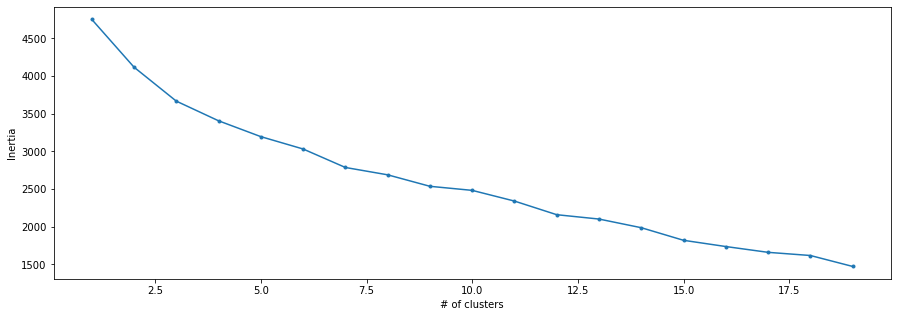

In [42]:
X1 = database_right.values
X1 = StandardScaler().fit_transform(X1)

plt.figure(figsize = (15,5))
K = range(1,20,1)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

In [43]:
k = [2,3,4,5,6,7,8]
for n_clusters in k:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_right = kmeans.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, cluster_labels_right)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.21854529160112957
For n_clusters = 3 The average silhouette_score is : 0.12292683665211
For n_clusters = 4 The average silhouette_score is : 0.10373993007068076
For n_clusters = 5 The average silhouette_score is : 0.11343468386708952
For n_clusters = 6 The average silhouette_score is : 0.1213201975780615
For n_clusters = 7 The average silhouette_score is : 0.11091594817722288
For n_clusters = 8 The average silhouette_score is : 0.09602967743067758


In [44]:
k_s = 3

kmeans = KMeans(n_clusters = k_s).fit(X1)
centroids = kmeans.cluster_centers_
cluster_labels_right_2 = kmeans.labels_

database_right['cluster_labels'] = cluster_labels_right_2
columns_of_interest = database_right.columns
print(cluster_labels_right_2)
database_right.head()

[1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 2 2 2 2 2 0 1 1 0 1 1 0
 1 0 1 1 0 0 0 1 0 0 0 1]


P1         P2         P4        P5         P6  \
Patients                                                                
M_DR_L002M1NAAA  62.939427  37.060573  46.982558  1.290000  46.565346   
M_DR_L002M2NAAA  57.795502  42.204498  68.036822  1.158333  51.884896   
M_DR_L022M1NAAA  66.656806  33.343194  45.328000  1.258333  47.719076   
M_DR_L031M1NAAA  66.041667  33.958333  54.785115  1.380000  43.518519   
M_DR_L031M3NAAA  68.096133  31.903867  66.392194  1.138333  52.752116   

                        P8        P10       P11         P12       P13  \
Patients                                                                
M_DR_L002M1NAAA  36.528477  22.506977  0.665000   90.270263  0.420000   
M_DR_L002M2NAAA  58.824138  31.717636  0.578333  103.933130  0.443333   
M_DR_L022M1NAAA  35.977656  20.904571  0.586667  102.303976  0.435000   
M_DR_L031M1NAAA  39.739809  28.843187  0.680000   88.272921  0.460000   
M_DR_L031M3NAAA  58.308268  35.382700  0.593333  101.182939  0.370000   

                      P14        HV1        HV2         KV1         KV2  \
Patients                                                                  
M_DR_L002M1NAAA  0.203333 -50.426812  48.577973   35.941583  -29.979234   
M_DR_L002M2NAAA  0.166667 -80.752790  87.281707  104.920805  -41.142917   
M_DR_L022M1NAAA  0.243333 -43.776753  71.587973  158.953706 -140.121832   
M_DR_L031M1NAAA  0.223333 -45.005464  58.093215  133.003003 -132.911973   
M_DR_L031M3NAAA  0.183333 -75.459986  57.155524  121.728584 -171.502166   

                        AV1      Vfdt1      Vfdt2        HR1        HR2  \
Patients                                                                  
M_DR_L002M1NAAA  -52.914337  20.556150  15.670808  13.911333   4.891333   
M_DR_L002M2NAAA  -79.064595   9.458853  37.565107  16.320333   6.492000   
M_DR_L022M1NAAA  -34.879469  21.313961  31.639737  25.479667  19.845667   
M_DR_L031M1NAAA -125.388381  36.185912  47.903338  19.515667  13.443667   
M_DR_L031M3NAAA  -71.571088  33.411732  73.170372  23.215000  17.217333   

                      HR3       THR1       THR2       HR4       HR5       HR6  \
Patients                                                                        
M_DR_L002M1NAAA  9.020000  65.314417  65.493083  3.427333 -0.712000  4.139333   
M_DR_L002M2NAAA  9.828333  51.723752  80.010372  3.605667 -3.042667  6.648333   
M_DR_L022M1NAAA  5.634000  12.911166  53.605487  1.592667 -1.833000  3.425667   
M_DR_L031M1NAAA  6.072000  24.112654  89.899691  0.346333 -6.373333  6.719667   
M_DR_L031M3NAAA  5.997667  70.123006   0.146843  1.101333 -7.426333  8.527667   

                      THR4       THR5       HR7       HR8        HR9  \
Patients                                                               
M_DR_L002M1NAAA  43.864871  50.101670  6.104333 -6.724000  12.828333   
M_DR_L002M2NAAA  36.441226   8.800351  3.858333 -6.792667  10.651000   
M_DR_L022M1NAAA  66.332156  47.554377  1.527667 -6.726667   8.254333   
M_DR_L031M1NAAA   7.746914  66.095679  3.768333 -4.587333   8.355667   
M_DR_L031M3NAAA  21.650874  70.436309  3.655333 -7.678000  11.333333   

                      THR7       THR8         H1         H2         H3  \
Patients                                                                 
M_DR_L002M1NAAA  37.747067  81.764006  27.918333  29.272333   2.820333   
M_DR_L002M2NAAA  48.513463  67.591418  33.288667  34.551333  -4.308667   
M_DR_L022M1NAAA  16.654595  81.193479  44.707333  44.719000  13.136333   
M_DR_L031M1NAAA  27.037037  63.919753  37.999000  38.286333   7.829333   
M_DR_L031M3NAAA  32.510855  88.857533  45.015667  45.048667   8.636000   

                        H4         H5         H6         H7       TH2  \
Patients                                                                
M_DR_L002M1NAAA   5.503667  32.282333   5.443000  29.462000  5.319579   
M_DR_L002M2NAAA  -0.959000  40.204667  -1.197333  44.513333  4.555078   
M_DR_L022M1NAAA  20.009000  47.917000  20.009000  34.780667  0.6

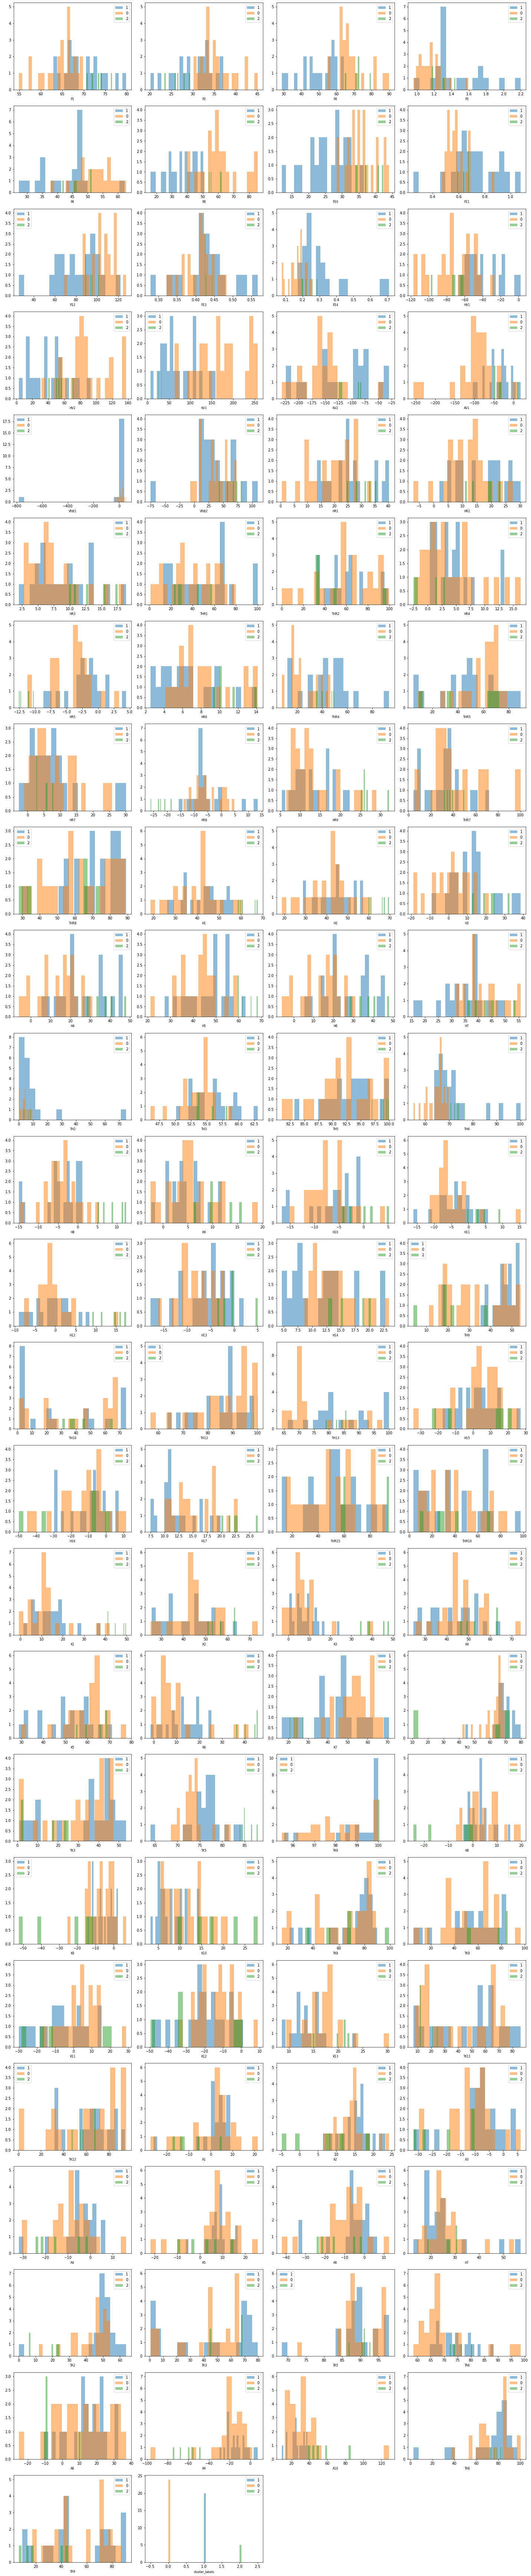

In [45]:
plt.figure(figsize = (20,100))
i = 1
for feature in database_right.columns:
    plt.subplot(26,4,i)
    for j in database_right['cluster_labels'].unique():
        plt.hist(database_right[database_right.cluster_labels == j][feature], bins = 20, alpha=0.5, 
                 label = j)
    plt.xlabel(feature, fontsize = 8)
    plt.legend(prop={"size":10})
    i += 1
plt.tight_layout()
plt.show()

#### Left

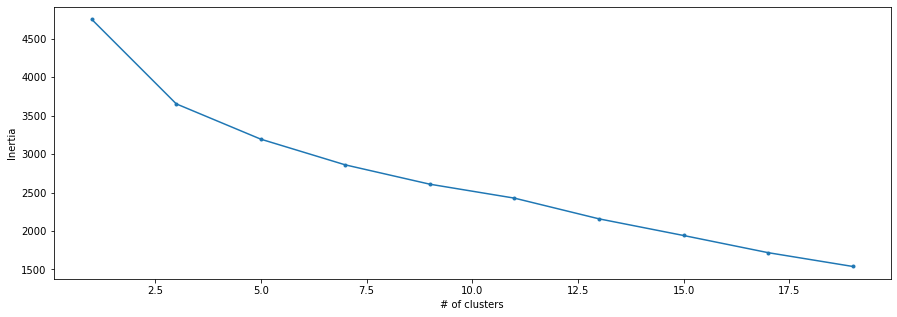

In [46]:
X1 = database_left.values
X1 = StandardScaler().fit_transform(X1)

plt.figure(figsize = (15,5))
K = range(1,20,2)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

In [47]:
k = [2,3,4,5,6,7,8,9,10]
for n_clusters in k:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_left = kmeans.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, cluster_labels_left)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.16938450253376258
For n_clusters = 3 The average silhouette_score is : 0.13639914255910685
For n_clusters = 4 The average silhouette_score is : 0.12002079412028116
For n_clusters = 5 The average silhouette_score is : 0.0732899903002901
For n_clusters = 6 The average silhouette_score is : 0.06483128852834785
For n_clusters = 7 The average silhouette_score is : 0.06625649908793235
For n_clusters = 8 The average silhouette_score is : 0.07476572590202488
For n_clusters = 9 The average silhouette_score is : 0.07211485876320188
For n_clusters = 10 The average silhouette_score is : 0.06139516868701334


In [48]:
k_s = 3

kmeans = KMeans(n_clusters = k_s).fit(X1)
centroids = kmeans.cluster_centers_
cluster_labels_left_2 = kmeans.labels_

database_left['cluster_labels'] = cluster_labels_left_2
columns_of_interest = database_left.columns
print(cluster_labels_left_2)
database_left.head(2)

[2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 1 1 1 0 0 0 0 0 2 2 1 2 1 1 2
 1 2 2 1 2 0 2 1 2 0 0 1]


P1         P2         P4     P5         P6         P8  \
Patients                                                                        
M_IZ_L002M1NAAA  67.182370  32.817630  50.302326  1.280  46.904616  39.269578   
M_IZ_L002M2NAAA  62.615632  37.384368  64.927519  1.185  50.658932  54.799654   

                       P10       P11        P12       P13       P14  \
Patients                                                              
M_IZ_L002M1NAAA  26.535659  0.623333  96.367229  0.476667  0.188333   
M_IZ_L002M2NAAA  34.013178  0.610000  98.373984  0.488333  0.090000   

                       HV1        HV2         KV1        KV2         AV1  \
Patients                                                                   
M_IZ_L002M1NAAA -64.943045  82.060669  148.180082 -93.381112  -86.162162   
M_IZ_L002M2NAAA -89.992005  87.076785  163.870160 -98.302135 -112.325769   

                     Vfdt1      Vfdt2        HR1       HR2       HR3  \
Patients                                                               
M_IZ_L002M1NAAA  15.373675  68.845202  12.732667  4.039000  8.693667   
M_IZ_L002M2NAAA  21.863426  60.706636  16.310667  7.472667  8.838000   

                      THR1       THR2    HR4       HR5       HR6       THR4  \
Patients                                                                      
M_IZ_L002M1NAAA  16.581212  49.826773  1.167 -3.846667  5.013667  64.465667   
M_IZ_L002M2NAAA  28.252204  57.899666  2.486 -3.813667  6.299667  45.597154   

                      THR5       HR7       HR8        HR9       THR7  \
Patients                                                               
M_IZ_L002M1NAAA  10.877351  6.602667 -8.045333  14.648000  58.553946   
M_IZ_L002M2NAAA  90.769699  7.017000 -2.361333   9.378333  22.665109   

                      THR8         H1         H2        H3        H4  \
Patients                                                               
M_IZ_L002M1NAAA  29.210998  35.185000  35.448667 -2.369667  7.823000   
M_IZ_L002M2NAAA  60.157482  37.996667  40.337667 -6.672333  1.141333   

                        H5        H6      H7       TH2        TH3        TH5  \
Patients                                                                       
M_IZ_L002M1NAAA  36.402667  7.823000  40.371  1.317523  56.572909  88.970343   
M_IZ_L002M2NAAA  35.394667  1.141333  47.010  5.325627  52.904906  91.857129   

                       TH6        H8        H9       H10       H11    H12  \
Patients                                                                    
M_IZ_L002M1NAAA  67.182370 -3.546333  0.254667 -6.599000 -5.194667 -2.978   
M_IZ_L002M2NAAA  62.615632 -9.335000  0.296333 -9.662667 -3.245000 -3.245   

                      H13        H14        TH9       TH10       TH12  \
Patients                                                                
M_IZ_L002M1NAAA -9.322333   9.712667  56.002198  34.233008  84.048654   
M_IZ_L002M2NAAA -8.617667  10.013667  53.984803   2.366543  62.615632   

                      TH13       H15        H16     H17      THR15      THR16  \
Patients                                                                        
M_IZ_L002M1NAAA  76.009327 -3.850333 -17.192333  13.342  54.019947  34.866632   
M_IZ_L002M2NAAA  84.055590 -2.713667 -15.864667  13.151  33.045994  26.148181   

                     K1         K2         K3      K4         K5         K6  \
Patients                                                                      
M_IZ_L002M1NAAA  23.634  42.790333  14.276667  43.693  53.982000  16.614667   
M_IZ_L002M2NAAA  15.458  31.987667   3.170333  31.440  46.383333   9.533667   

                        K7        TK2        TK3        TK5        TK6  \
Patients                                                                 
M_IZ_L002M1NAAA  40.413333  66.791498  41.942745  74.856549  97.969523   
M_IZ_L002M2NAAA  43.213000  45.386752  41.662209  69.645397  97.625498   

                       K8        K9       K10        TK8       

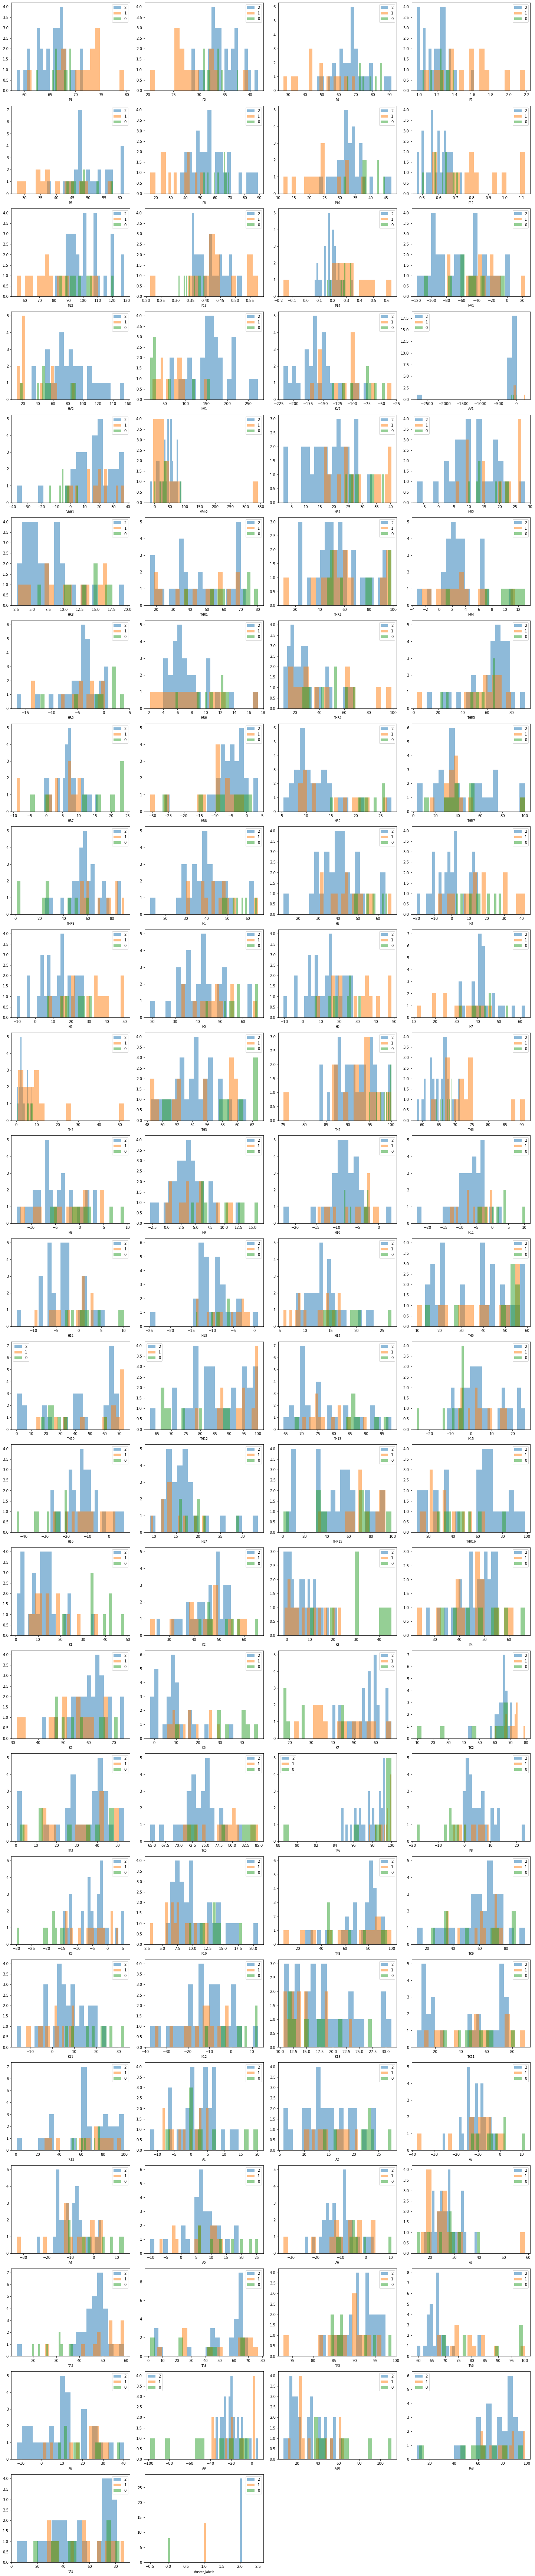

In [49]:
plt.figure(figsize = (20,100))
i = 1
for feature in database_left.columns:
    plt.subplot(26,4,i)
    for j in database_left['cluster_labels'].unique():
        plt.hist(database_left[database_left.cluster_labels == j][feature], bins = 20, alpha=0.5, 
                 label = j)
    plt.xlabel(feature, fontsize = 8)
    plt.legend(prop={"size":10})
    i += 1
plt.tight_layout()
plt.show()

In [ ]:
#cluster_labels_left_new_2 = []
#for i in cluster_labels_left_2:
#    if i == 0:
#        cluster_labels_left_new_2.append(0)
#    elif i == 2:
#        cluster_labels_left_new_2.append(1)
#    else:
#        cluster_labels_left_new_2.append(2)
#        
#cluster_labels_right_new_2 = []
#for i in cluster_labels_right_2:
#    if i == 0:
#        cluster_labels_right_new_2.append(0)
#    elif i == 1:
#        cluster_labels_right_new_2.append(1)
#    else:
#        cluster_labels_right_new_2.append(2)     

In [50]:
for i in zip(cluster_labels_right_2,cluster_labels_left_2):
    print('Right : ', i[0], ' , Left : ', i[1])

Right :  1  , Left :  2
Right :  0  , Left :  2
Right :  1  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  1  , Left :  2
Right :  1  , Left :  2
Right :  1  , Left :  1
Right :  1  , Left :  2
Right :  0  , Left :  2
Right :  1  , Left :  1
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  1  , Left :  1
Right :  0  , Left :  2
Right :  1  , Left :  1
Right :  1  , Left :  1
Right :  1  , Left :  1
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  0  , Left :  2
Right :  1  , Left :  2
Right :  1  , Left :  1
Right :  0  , Left :  2
Right :  1  , Left :  1
Right :  1  , Left :  1
Right :  0  , Left :  2
Right :  1  , Left :  1
Right :  0  , Left :  2
Right :  1  , Left :  2
Right :  1  , Left :  1
Right :  0  , Le

---

## The four clusters :

In [51]:
for i in zip(cluster_labels_right,cluster_labels_left):
    print('Right : ', i[0], ' , Left : ', i[1])

Right :  2  , Left :  1
Right :  2  , Left :  2
Right :  6  , Left :  1
Right :  6  , Left :  1
Right :  1  , Left :  5
Right :  5  , Left :  2
Right :  4  , Left :  4
Right :  1  , Left :  2
Right :  6  , Left :  5
Right :  5  , Left :  2
Right :  6  , Left :  5
Right :  2  , Left :  9
Right :  2  , Left :  9
Right :  0  , Left :  0
Right :  2  , Left :  4
Right :  5  , Left :  2
Right :  6  , Left :  9
Right :  6  , Left :  1
Right :  6  , Left :  1
Right :  3  , Left :  4
Right :  0  , Left :  0
Right :  6  , Left :  1
Right :  7  , Left :  6
Right :  3  , Left :  7
Right :  3  , Left :  7
Right :  4  , Left :  3
Right :  4  , Left :  3
Right :  4  , Left :  3
Right :  4  , Left :  3
Right :  4  , Left :  3
Right :  1  , Left :  2
Right :  1  , Left :  4
Right :  0  , Left :  0
Right :  1  , Left :  5
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  1  , Left :  1
Right :  2  , Left :  0
Right :  1  , Left :  2
Right :  6  , Left :  4
Right :  2  , Left :  1
Right :  1  , Le

In [52]:
for i in zip(cluster_labels_right_2,cluster_labels_left_2):
    print('Right : ', i[0], ' , Left : ', i[1])

Right :  1  , Left :  2
Right :  0  , Left :  2
Right :  1  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  1  , Left :  2
Right :  1  , Left :  2
Right :  1  , Left :  1
Right :  1  , Left :  2
Right :  0  , Left :  2
Right :  1  , Left :  1
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  1  , Left :  1
Right :  0  , Left :  2
Right :  1  , Left :  1
Right :  1  , Left :  1
Right :  1  , Left :  1
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  2  , Left :  0
Right :  0  , Left :  2
Right :  1  , Left :  2
Right :  1  , Left :  1
Right :  0  , Left :  2
Right :  1  , Left :  1
Right :  1  , Left :  1
Right :  0  , Left :  2
Right :  1  , Left :  1
Right :  0  , Left :  2
Right :  1  , Left :  2
Right :  1  , Left :  1
Right :  0  , Le

In [53]:
for i in zip(cluster_labels_right,cluster_labels_left,cluster_labels_right_2,cluster_labels_left_2):
    print('Right with P:  ',i[0],'  Left with P:  ', i[1],'  Right no P:  ', i[2],
          '  Left no P:  ', i[3])

Right with P:   2   Left with P:   1   Right no P:   1   Left no P:   2
Right with P:   2   Left with P:   2   Right no P:   0   Left no P:   2
Right with P:   6   Left with P:   1   Right no P:   1   Left no P:   2
Right with P:   6   Left with P:   1   Right no P:   0   Left no P:   2
Right with P:   1   Left with P:   5   Right no P:   0   Left no P:   2
Right with P:   5   Left with P:   2   Right no P:   0   Left no P:   2
Right with P:   4   Left with P:   4   Right no P:   0   Left no P:   2
Right with P:   1   Left with P:   2   Right no P:   0   Left no P:   2
Right with P:   6   Left with P:   5   Right no P:   0   Left no P:   2
Right with P:   5   Left with P:   2   Right no P:   0   Left no P:   2
Right with P:   6   Left with P:   5   Right no P:   0   Left no P:   2
Right with P:   2   Left with P:   9   Right no P:   1   Left no P:   2
Right with P:   2   Left with P:   9   Right no P:   1   Left no P:   2
Right with P:   0   Left with P:   0   Right no P:   1   Left no

---

# Hierarchichal after dropping P3,7,9 features

In [54]:
database_right = Dataframe_second.loc[Right]
database_left = Dataframe_second.loc[Left]

print(database_right.shape, database_left.shape)

(49, 97) (49, 97)


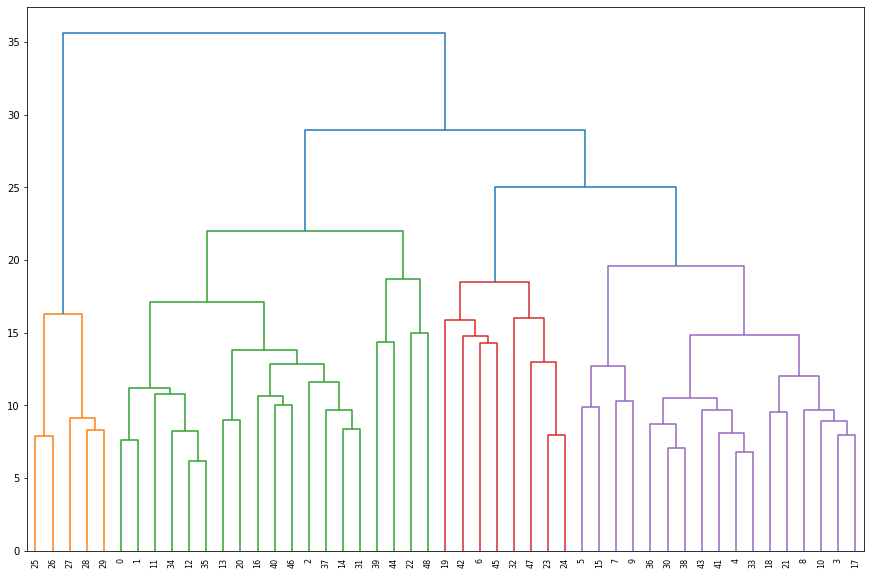

In [55]:
X1 = database_right.values
X1 = StandardScaler().fit_transform(X1)

plt.figure(figsize = (15,10))
Z = linkage(X1, 'ward')
dendrogram(Z)
plt.show()

In [56]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward' ).fit(X1)
cluster_labels_r = agg.labels_
database_right['cluster_labels'] = cluster_labels_r
print(cluster_labels_r)

[0 0 0 2 2 2 1 2 2 2 2 0 0 0 0 2 0 2 2 1 0 2 0 1 1 3 3 3 3 3 2 0 1 2 0 0 2
 0 2 0 0 2 1 2 0 1 0 1 0]


In [57]:
database_right.head()

P1         P2         P4        P5         P6  \
Patients                                                                
M_DR_L002M1NAAA  62.939427  37.060573  46.982558  1.290000  46.565346   
M_DR_L002M2NAAA  57.795502  42.204498  68.036822  1.158333  51.884896   
M_DR_L022M1NAAA  66.656806  33.343194  45.328000  1.258333  47.719076   
M_DR_L031M1NAAA  66.041667  33.958333  54.785115  1.380000  43.518519   
M_DR_L031M3NAAA  68.096133  31.903867  66.392194  1.138333  52.752116   

                        P8        P10       P11         P12       P13  \
Patients                                                                
M_DR_L002M1NAAA  36.528477  22.506977  0.665000   90.270263  0.420000   
M_DR_L002M2NAAA  58.824138  31.717636  0.578333  103.933130  0.443333   
M_DR_L022M1NAAA  35.977656  20.904571  0.586667  102.303976  0.435000   
M_DR_L031M1NAAA  39.739809  28.843187  0.680000   88.272921  0.460000   
M_DR_L031M3NAAA  58.308268  35.382700  0.593333  101.182939  0.370000   

                      P14        HV1        HV2         KV1         KV2  \
Patients                                                                  
M_DR_L002M1NAAA  0.203333 -50.426812  48.577973   35.941583  -29.979234   
M_DR_L002M2NAAA  0.166667 -80.752790  87.281707  104.920805  -41.142917   
M_DR_L022M1NAAA  0.243333 -43.776753  71.587973  158.953706 -140.121832   
M_DR_L031M1NAAA  0.223333 -45.005464  58.093215  133.003003 -132.911973   
M_DR_L031M3NAAA  0.183333 -75.459986  57.155524  121.728584 -171.502166   

                        AV1      Vfdt1      Vfdt2        HR1        HR2  \
Patients                                                                  
M_DR_L002M1NAAA  -52.914337  20.556150  15.670808  13.911333   4.891333   
M_DR_L002M2NAAA  -79.064595   9.458853  37.565107  16.320333   6.492000   
M_DR_L022M1NAAA  -34.879469  21.313961  31.639737  25.479667  19.845667   
M_DR_L031M1NAAA -125.388381  36.185912  47.903338  19.515667  13.443667   
M_DR_L031M3NAAA  -71.571088  33.411732  73.170372  23.215000  17.217333   

                      HR3       THR1       THR2       HR4       HR5       HR6  \
Patients                                                                        
M_DR_L002M1NAAA  9.020000  65.314417  65.493083  3.427333 -0.712000  4.139333   
M_DR_L002M2NAAA  9.828333  51.723752  80.010372  3.605667 -3.042667  6.648333   
M_DR_L022M1NAAA  5.634000  12.911166  53.605487  1.592667 -1.833000  3.425667   
M_DR_L031M1NAAA  6.072000  24.112654  89.899691  0.346333 -6.373333  6.719667   
M_DR_L031M3NAAA  5.997667  70.123006   0.146843  1.101333 -7.426333  8.527667   

                      THR4       THR5       HR7       HR8        HR9  \
Patients                                                               
M_DR_L002M1NAAA  43.864871  50.101670  6.104333 -6.724000  12.828333   
M_DR_L002M2NAAA  36.441226   8.800351  3.858333 -6.792667  10.651000   
M_DR_L022M1NAAA  66.332156  47.554377  1.527667 -6.726667   8.254333   
M_DR_L031M1NAAA   7.746914  66.095679  3.768333 -4.587333   8.355667   
M_DR_L031M3NAAA  21.650874  70.436309  3.655333 -7.678000  11.333333   

                      THR7       THR8         H1         H2         H3  \
Patients                                                                 
M_DR_L002M1NAAA  37.747067  81.764006  27.918333  29.272333   2.820333   
M_DR_L002M2NAAA  48.513463  67.591418  33.288667  34.551333  -4.308667   
M_DR_L022M1NAAA  16.654595  81.193479  44.707333  44.719000  13.136333   
M_DR_L031M1NAAA  27.037037  63.919753  37.999000  38.286333   7.829333   
M_DR_L031M3NAAA  32.510855  88.857533  45.015667  45.048667   8.636000   

                        H4         H5         H6         H7       TH2  \
Patients                                                                
M_DR_L002M1NAAA   5.503667  32.282333   5.443000  29.462000  5.319579   
M_DR_L002M2NAAA  -0.959000  40.204667  -1.197333  44.513333  4.555078   
M_DR_L022M1NAAA  20.009000  47.917000  20.009000  34.780667  0.6

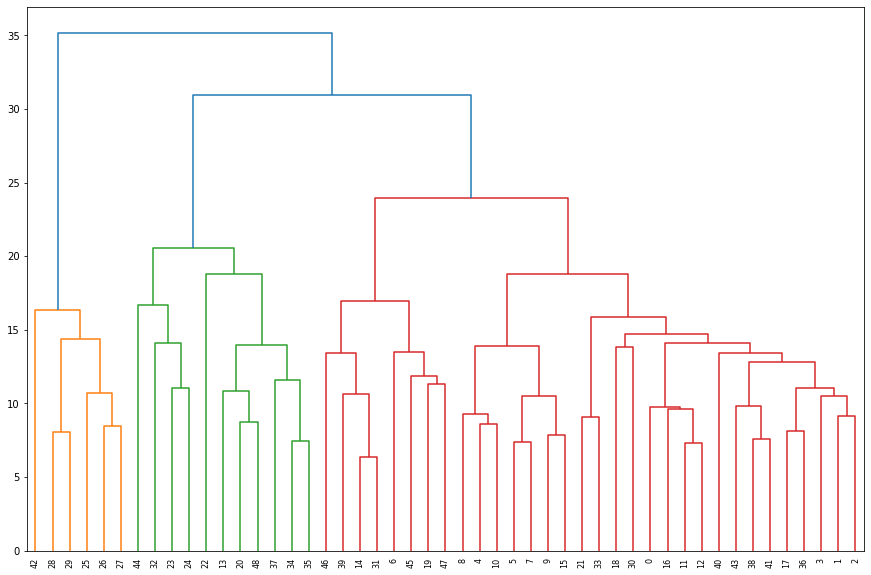

In [58]:
X1 = database_left.values
X1 = StandardScaler().fit_transform(X1)

plt.figure(figsize = (15,10))
Z = linkage(X1, 'ward')
dendrogram(Z)
plt.show()

In [59]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward' ).fit(X1)
cluster_labels_l = agg.labels_
database_left['cluster_labels'] = cluster_labels_l
print(cluster_labels_l)

[2 2 2 2 2 2 1 2 2 2 2 2 2 0 1 2 2 2 2 1 0 2 0 0 0 3 3 3 3 3 2 1 0 2 0 0 2
 0 2 1 2 2 3 2 0 1 1 1 0]


In [60]:
database_left.head()

P1         P2         P4        P5         P6  \
Patients                                                                
M_IZ_L002M1NAAA  67.182370  32.817630  50.302326  1.280000  46.904616   
M_IZ_L002M2NAAA  62.615632  37.384368  64.927519  1.185000  50.658932   
M_IZ_L022M1NAAA  66.183206  33.816794  47.130095  1.290000  46.534351   
M_IZ_L031M1NAAA  66.190476  33.809524  54.226205  1.358333  44.224197   
M_IZ_L031M3NAAA  67.723138  32.276862  69.476793  1.146667  52.336464   

                        P8        P10       P11         P12       P13  \
Patients                                                                
M_IZ_L002M1NAAA  39.269578  26.535659  0.623333   96.367229  0.476667   
M_IZ_L002M2NAAA  54.799654  34.013178  0.610000   98.373984  0.488333   
M_IZ_L022M1NAAA  36.621527  23.218286  0.678333   88.650584  0.420000   
M_IZ_L031M1NAAA  40.053913  27.066038  0.683333   88.099288  0.468333   
M_IZ_L031M3NAAA  60.584523  34.094093  0.553333  108.435708  0.363333   

                      P14        HV1        HV2         KV1         KV2  \
Patients                                                                  
M_IZ_L002M1NAAA  0.188333 -64.943045  82.060669  148.180082  -93.381112   
M_IZ_L002M2NAAA  0.090000 -89.992005  87.076785  163.870160  -98.302135   
M_IZ_L022M1NAAA  0.166667 -31.681045  51.505085  139.169216 -157.924035   
M_IZ_L031M1NAAA  0.211667 -44.098492  58.931467  150.406778 -142.667841   
M_IZ_L031M3NAAA  0.230000 -84.154538  68.222663  149.111112 -217.078545   

                        AV1      Vfdt1      Vfdt2        HR1        HR2  \
Patients                                                                  
M_IZ_L002M1NAAA  -86.162162  15.373675  68.845202  12.732667   4.039000   
M_IZ_L002M2NAAA -112.325769  21.863426  60.706636  16.310667   7.472667   
M_IZ_L022M1NAAA  -56.064145  20.848420  55.993016  25.191333  19.507667   
M_IZ_L031M1NAAA -141.918544  28.106812  74.930006  19.220333  13.939000   
M_IZ_L031M3NAAA  -83.763974   1.590823  29.342872  23.238333  17.920000   

                      HR3       THR1       THR2       HR4       HR5  \
Patients                                                              
M_IZ_L002M1NAAA  8.693667  16.581212  49.826773  1.167000 -3.846667   
M_IZ_L002M2NAAA  8.838000  28.252204  57.899666  2.486000 -3.813667   
M_IZ_L022M1NAAA  5.683667  52.933333  36.770483  2.492000 -1.671667   
M_IZ_L031M1NAAA  5.281333  37.129376  60.887066  6.258333 -0.375333   
M_IZ_L031M3NAAA  5.318333  38.898136  67.938988  7.426333 -2.863667   

                       HR6       THR4       THR5       HR7       HR8  \
Patients                                                               
M_IZ_L002M1NAAA   5.013667  64.465667  10.877351  6.602667 -8.045333   
M_IZ_L002M2NAAA   6.299667  45.597154  90.769699  7.017000 -2.361333   
M_IZ_L022M1NAAA   4.163667  19.032061  47.964377  7.275000 -1.006333   
M_IZ_L031M1NAAA   6.633667  16.472811  62.024759  5.643667 -4.527000   
M_IZ_L031M3NAAA  10.290000  22.387925  77.288148  7.678000 -6.429333   

                       HR9       THR7       THR8         H1         H2  \
Patients                                                                 
M_IZ_L002M1NAAA  14.648000  58.553946  29.210998  35.185000  35.448667   
M_IZ_L002M2NAAA   9.378333  22.665109  60.157482  37.996667  40.337667   
M_IZ_L022M1NAAA   8.281333  25.218321  73.237659  39.687000  39.756000   
M_IZ_L031M1NAAA  10.170667  20.647262  76.855016  35.659000  36.084000   
M_IZ_L031M3NAAA  14.107333  40.686695  87.493728  39.857000  41.071000   

                        H3         H4         H5         H6         H7  \
Patients                                                                 
M_IZ_L002M1NAAA  -2.369667   7.823000  36.402667   7.823000  40.371000   
M_IZ_L002M2NAAA  -6.672333   1.141333  35.394667   1.141333  47.010000   
M_IZ_L022M1NAAA  12.827000  18.329000  43.762000  18.287000  30.935000   
M_IZ_L031M1NAAA   7.848000  19.348667  38.824000  19.348

In [61]:
#cluster_labels_r_new = []
#for i in cluster_labels_r:
#    if i == 0:
#        cluster_labels_r_new.append(0)
#    elif i == 2:
#        cluster_labels_r_new.append(1)
#    else:
#        cluster_labels_r_new.append(2)
#print(cluster_labels_r_new)

In [62]:
#cluster_labels_l_new = []
#for i in cluster_labels_l:
#    if i == 0:
#        cluster_labels_l_new.append(0)
#    elif i == 2:
#        cluster_labels_l_new.append(1)
#    else:
#        cluster_labels_l_new.append(2)
#print(cluster_labels_l_new)

In [63]:
for i in zip(cluster_labels_r,cluster_labels_l):
    print('Right : ', i[0], ' , Left : ', i[1])

Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  2  , Left :  2
Right :  2  , Left :  2
Right :  2  , Left :  2
Right :  1  , Left :  1
Right :  2  , Left :  2
Right :  2  , Left :  2
Right :  2  , Left :  2
Right :  2  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  2
Right :  0  , Left :  0
Right :  0  , Left :  1
Right :  2  , Left :  2
Right :  0  , Left :  2
Right :  2  , Left :  2
Right :  2  , Left :  2
Right :  1  , Left :  1
Right :  0  , Left :  0
Right :  2  , Left :  2
Right :  0  , Left :  0
Right :  1  , Left :  0
Right :  1  , Left :  0
Right :  3  , Left :  3
Right :  3  , Left :  3
Right :  3  , Left :  3
Right :  3  , Left :  3
Right :  3  , Left :  3
Right :  2  , Left :  2
Right :  0  , Left :  1
Right :  1  , Left :  0
Right :  2  , Left :  2
Right :  0  , Left :  0
Right :  0  , Left :  0
Right :  2  , Left :  2
Right :  0  , Left :  0
Right :  2  , Left :  2
Right :  0  , Left :  1
Right :  0  , Left :  2
Right :  2  , Le

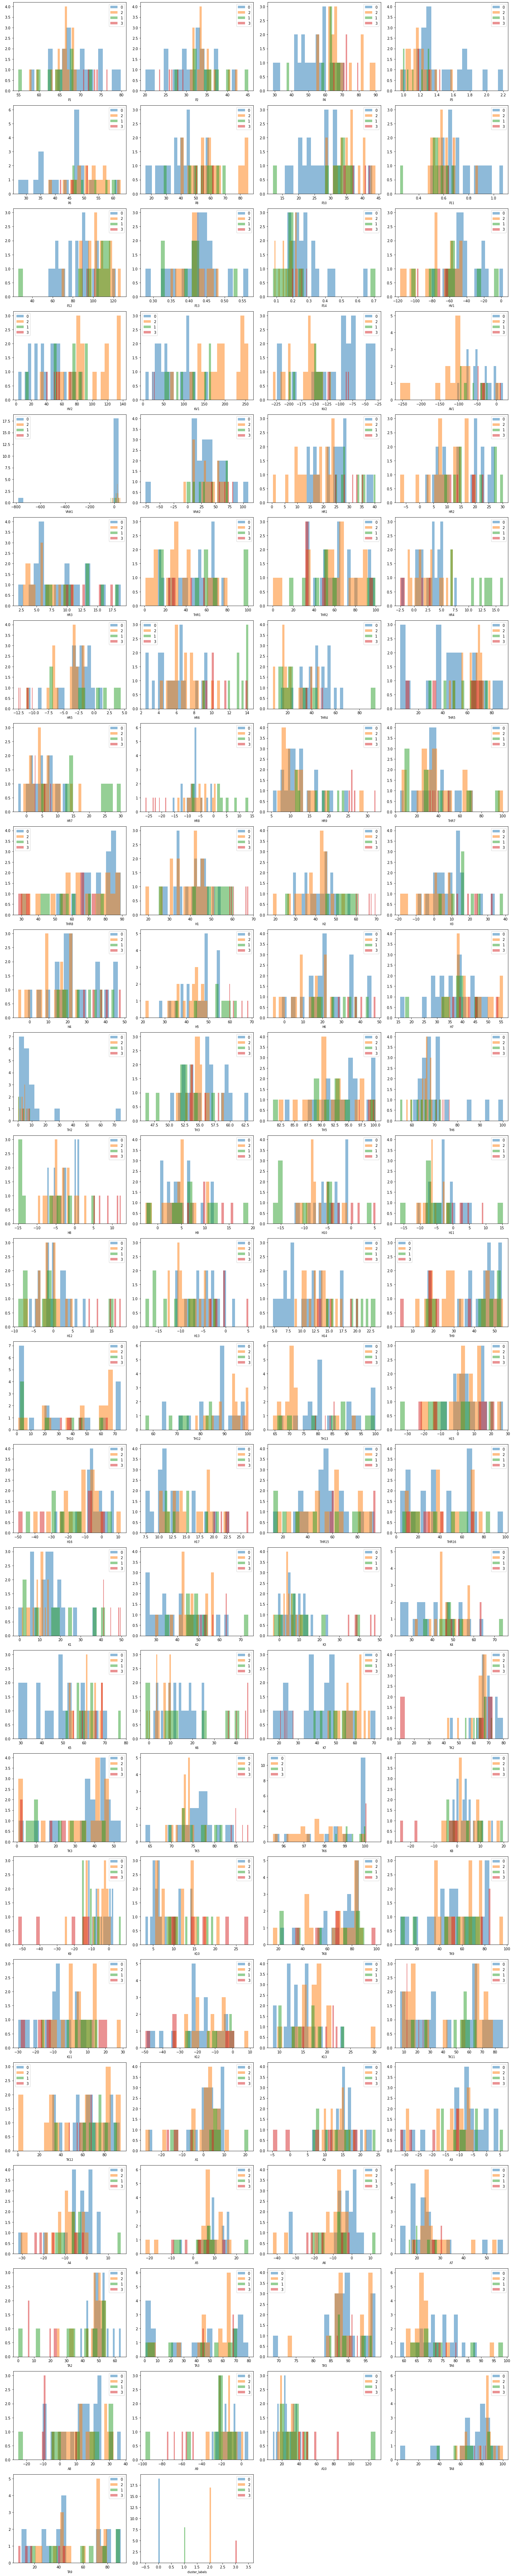

In [65]:
plt.figure(figsize = (20,100))
i = 1
for feature in database_right.columns:
    plt.subplot(25,4,i)
    for j in database_right['cluster_labels'].unique():
        plt.hist(database_right[database_right.cluster_labels == j][feature], bins = 20, alpha=0.5, 
                 label = j)
    plt.xlabel(feature, fontsize = 8)
    plt.legend(prop={"size":10})
    i += 1
plt.tight_layout()
plt.show()

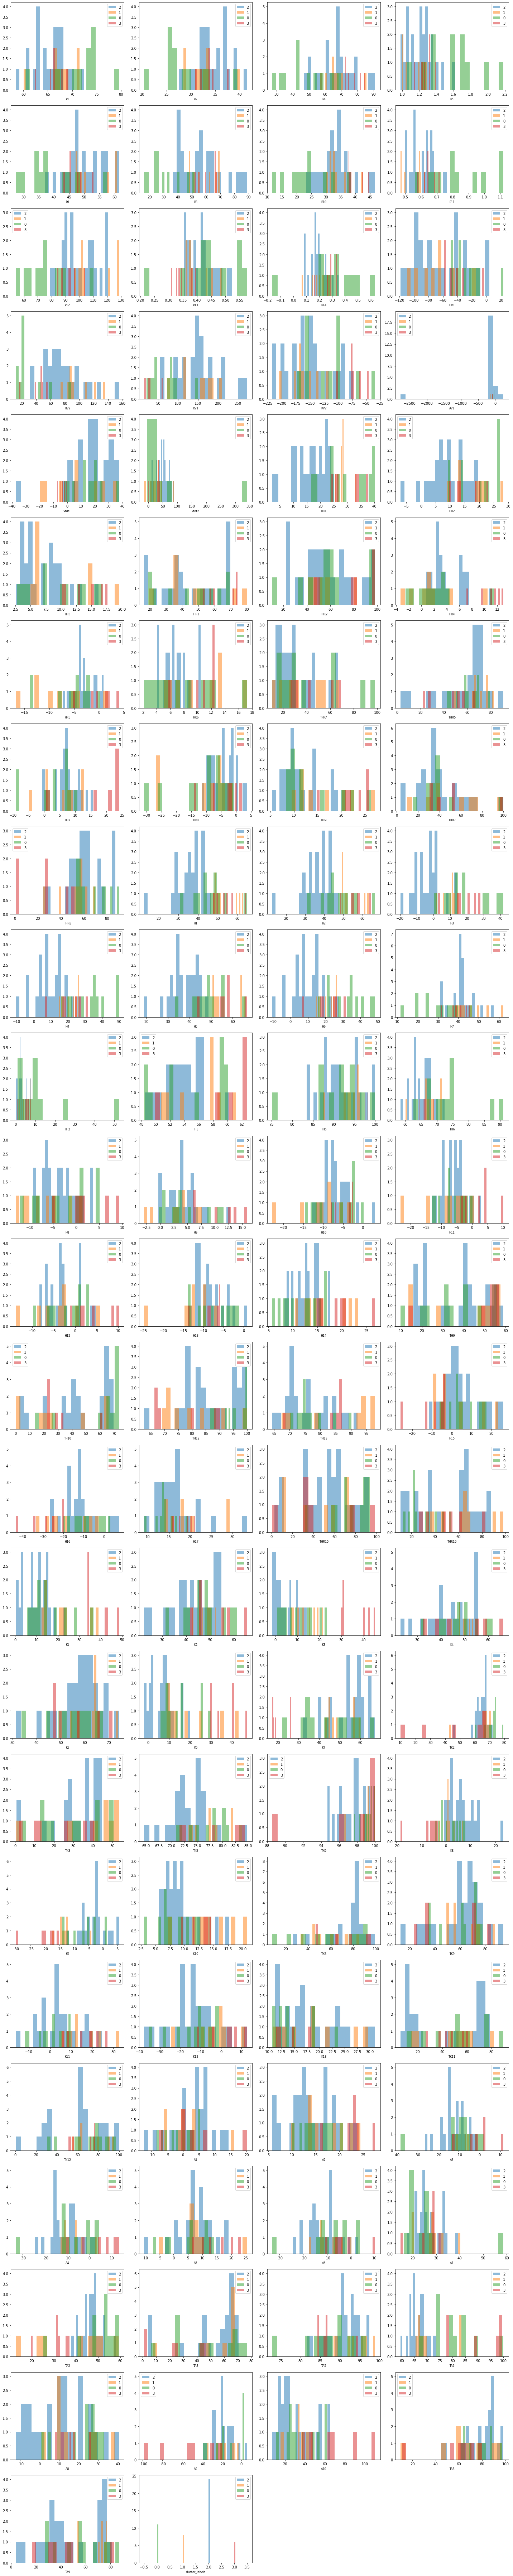

In [66]:
plt.figure(figsize = (20,100))
i = 1
for feature in database_left.columns:
    plt.subplot(25,4,i)
    for j in database_left['cluster_labels'].unique():
        plt.hist(database_left[database_left.cluster_labels == j][feature], bins = 20, alpha=0.5, 
                 label = j)
    plt.xlabel(feature, fontsize = 8)
    plt.legend(prop={"size":10})
    i += 1
plt.tight_layout()
plt.show()